## Exercise #2: Data Analysis and Visualization

In [97]:
# Cell 1: Import Libraries
# Import necessary libraries for data analysis, clustering, and visualization.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns

In [98]:
# Cell 2: Load and Preview the Data
# Load the Excel file and display the first few rows of the dataset to understand its structure.
exercise_2_df = pd.read_excel('../data/Exercise #2.xlsx')

# Clean and trim column names
exercise_2_df.columns = (exercise_2_df.columns
                         .str.strip()                               # Remove leading and trailing spaces
                         .str.replace(r'\s+', '_', regex=True)      # Replace multiple spaces with a single underscore
                         .str.lower()                               # Convert to lowercase
                         .str.replace(r'[^\w]', '_', regex=True)    # Replace non-alphanumeric characters with underscores
                         .str.replace(r'_{2,}', '_', regex=True)    # Replace multiple consecutive underscores with a single underscore
                         .str.strip('_')                            # Remove leading and trailing underscores
                        )

# Display cleaned column names
print(exercise_2_df.columns)

Index(['mirc_subpractice', 'attorney_on_case', 'client_birthdate',
       'client_country_of_origin', 'client_language', 'client_city',
       'immigration_court_location', 'event_type', 'event_date',
       'application_petition_type',
       'application_petition_outcome_date_if_applicable',
       'application_petition_outcome', 'court_hearing_is_remote_or_in_person',
       'reason_for_application_petition_denial_provided_by_uscis',
       'reason_for_case_representation_ended_if_applicable'],
      dtype='object')


In [99]:
# Cell 3: Handle Datetime Columns
# Check and convert 'event_date' to datetime format, then calculate 'processing_time' as the difference in days.

exercise_2_df['event_date'] = pd.to_datetime(exercise_2_df['event_date'], errors='coerce')

# Replace missing outcome dates with today's date
today_date = pd.to_datetime(datetime.today().strftime('%Y-%m-%d'))
exercise_2_df['application_petition_outcome_date_if_applicable'] = pd.to_datetime(
    exercise_2_df['application_petition_outcome_date_if_applicable'], errors='coerce'
).fillna(today_date)

# Calculate processing_time
exercise_2_df['processing_time'] = (exercise_2_df['application_petition_outcome_date_if_applicable'] - exercise_2_df['event_date']).dt.days

# Convert 'client_birthdate' to datetime format
exercise_2_df['client_birthdate'] = pd.to_datetime(exercise_2_df['client_birthdate'], errors='coerce')

# Calculate client age for non-null birthdates
exercise_2_df['client_age'] = (today_date - exercise_2_df['client_birthdate']).dt.days / 365.25

# Calculate the average age of clients with non-null birthdates
average_age = exercise_2_df['client_age'].dropna().mean()

# Calculate an average birthdate
average_birthdate = today_date - pd.DateOffset(years=int(average_age))

# Fill missing birthdates with the calculated average birthdate
exercise_2_df['client_birthdate'] = exercise_2_df['client_birthdate'].fillna(average_birthdate)

# Recalculate client age after filling missing birthdates
exercise_2_df['client_age'] = (today_date - exercise_2_df['client_birthdate']).dt.days / 365.25
exercise_2_df['client_age'] = exercise_2_df['client_age'].astype(int)  # Convert age to integer

# Extract the year from the event_date
exercise_2_df['event_year_month'] = exercise_2_df['event_date'].dt.to_period('M')

exercise_2_df

,mirc_subpractice,attorney_on_case,client_birthdate,client_country_of_origin,client_language,client_city,immigration_court_location,event_type,event_date,application_petition_type,application_petition_outcome_date_if_applicable,application_petition_outcome,court_hearing_is_remote_or_in_person,reason_for_application_petition_denial_provided_by_uscis,reason_for_case_representation_ended_if_applicable,processing_time,client_age,event_year_month
0,Released,BB,2008-02-10,Afghanistan,NaN,Grand Rapids,Detroit,Application/petition filed,2022-09-13,I-485,2022-09-21,Denied,NaN,Fee not included,NaN,8,16,2022-09
1,Released,BB,2008-08-16,Afghanistan,NaN,Kalamazoo,Detroit,Application/petition filed,2022-11-12,I-360,2022-11-23,Denied,NaN,Request for evidence not responded to,NaN,11,16,2022-11
2,Released,DD,2008-03-29,Afghanistan,Pashto,Ypsilanti,Detroit,Application/petition filed,2022-12-16,State Court Petition,2024-08-16,Pending,NaN,NaN,Immigration Relief Granted,609,16,2022-12
3,Released,CC,2005-06-12,Afghanistan,NaN,Traverse City,Detroit,Application/petition filed,2022-09-22,State Court Petition,2022-10-01,Granted,NaN,NaN,NaN,9,19,2022-09
4,Released,CC,2004-03-15,Afghanistan,NaN,Traverse City,Detroit,Application/petition filed,2022-12-22,State Court Petition,2024-08-16,Pending,NaN,NaN,NaN,603,20,2022-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Released,II,2008-08-01,Honduras,Spanish,Detroit,Detroit,Representation initiated,2022-09-10,NaN,2024-08-16,NaN,NaN,NaN,NaN,706,16,2022-09
162,Released,CC,2005-06-25,Honduras,Spanish,Lansing,Detroit,Representation initiated,2022-10-26,NaN,2024-08-16,NaN,NaN,NaN,NaN,660,19,2022-10
163,Released,AA,2010-02-14,Mexico,Spanish,Grand Rapids,Detroit,Representation initiated,2022-10-18,NaN,2024-08-16,NaN,NaN,NaN,NaN,668,14,2022-10
164,Released,II,2008-10-10,Mexico,Tzotzil Maya,Grand Rapids,Detroit,Representation initiated,2022-10-26,NaN,2024-08-16,NaN,NaN,NaN,NaN,660,15,2022-10


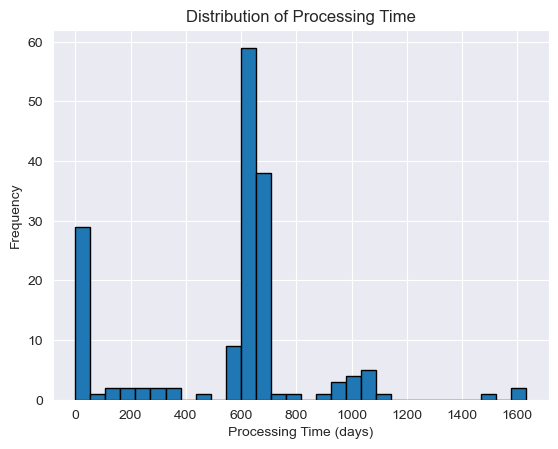

In [100]:
# Cell 5: Exploratory Data Analysis (EDA)
# Generate descriptive statistics.
# Visualize the distribution of key variables.
# Explore relationships between variables.

# Histogram of processing_time
plt.hist(exercise_2_df['processing_time'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Processing Time')
plt.xlabel('Processing Time (days)')
plt.ylabel('Frequency')
plt.show()


<Figure size 1200x600 with 0 Axes>

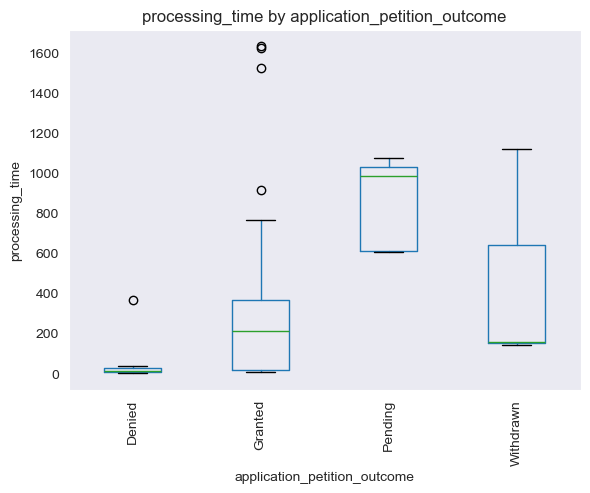

<Figure size 1200x600 with 0 Axes>

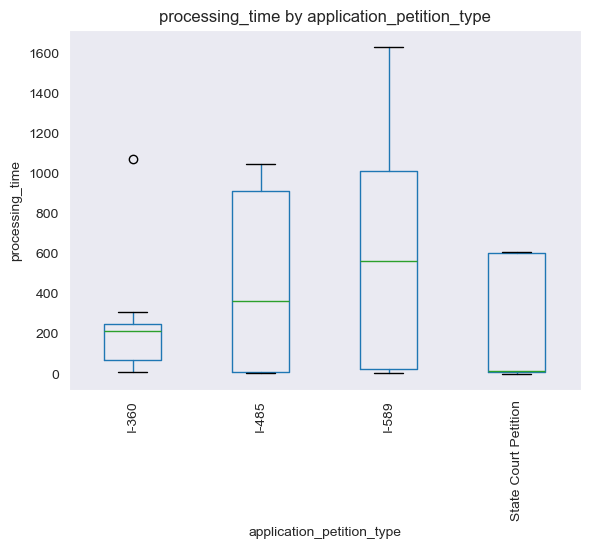

<Figure size 1200x600 with 0 Axes>

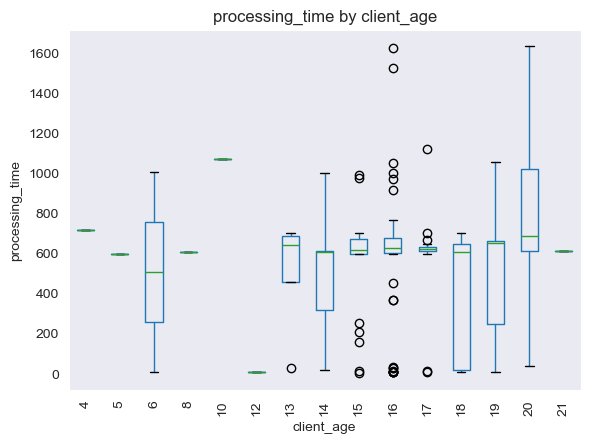

In [109]:
def box_plot(grouped_df, column='processing_time', by='application_petition_outcome'):
    # Boxplot for processing_time by event_type
    plt.figure(figsize=(12, 6))
    grouped_df.boxplot(column=column, by=by, grid=False)
    plt.title(f'{column} by {by}')
    plt.suptitle('')
    plt.xlabel(by)
    plt.ylabel(column)
    plt.xticks(rotation=90)
    plt.show()
    
box_plot(exercise_2_df)
box_plot(exercise_2_df, by='application_petition_type')
box_plot(exercise_2_df, by='client_age')

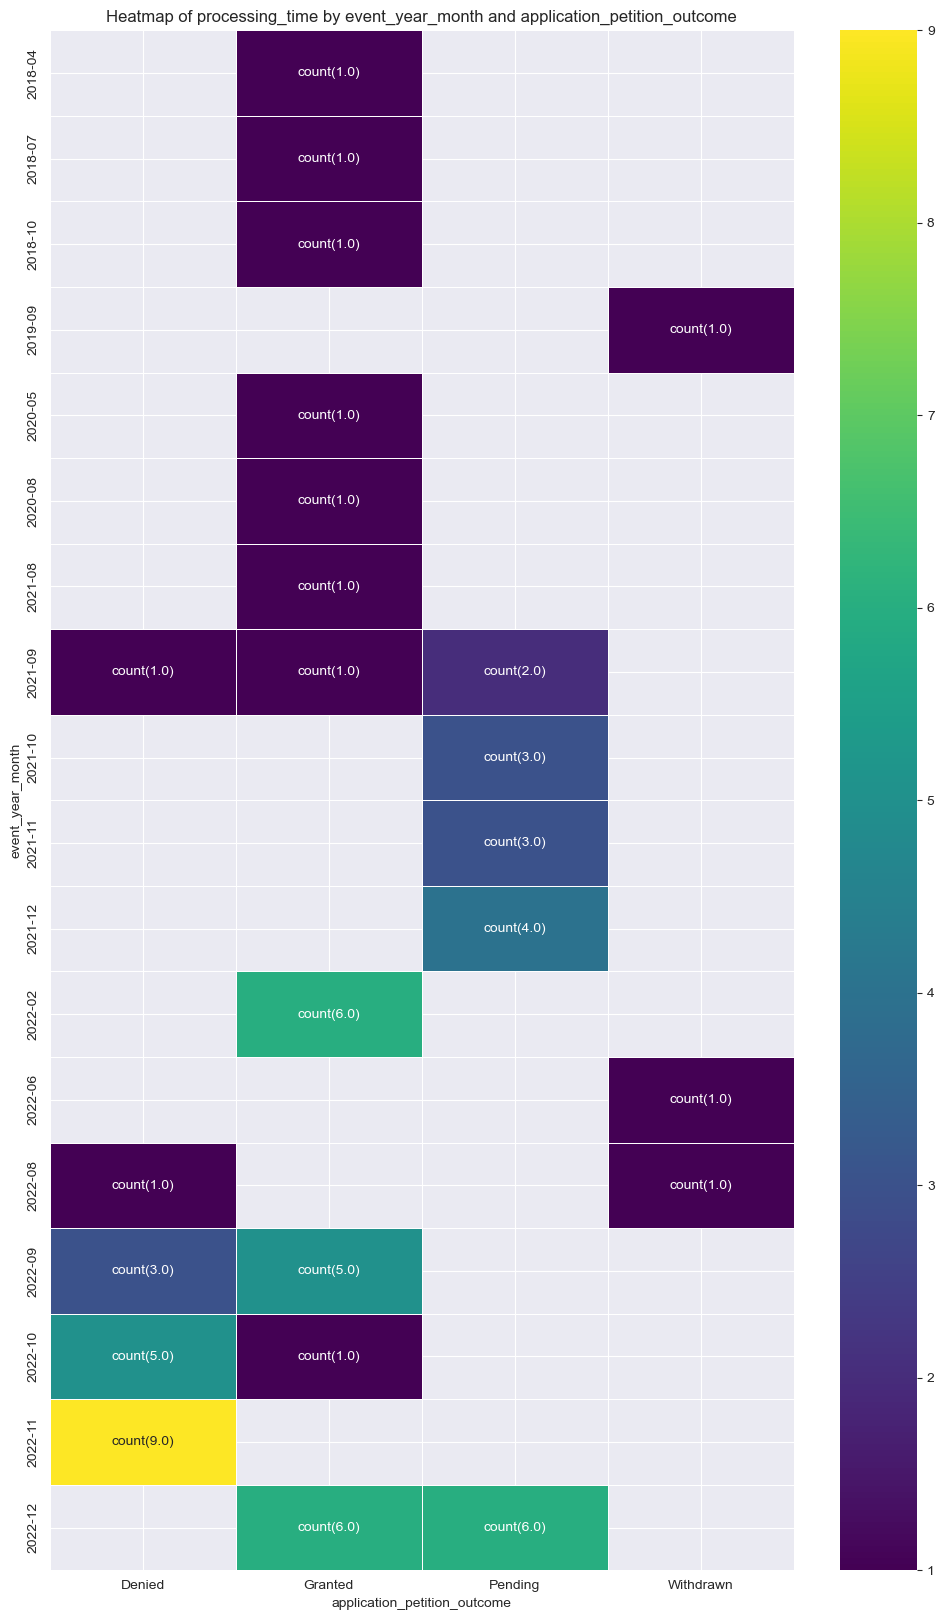

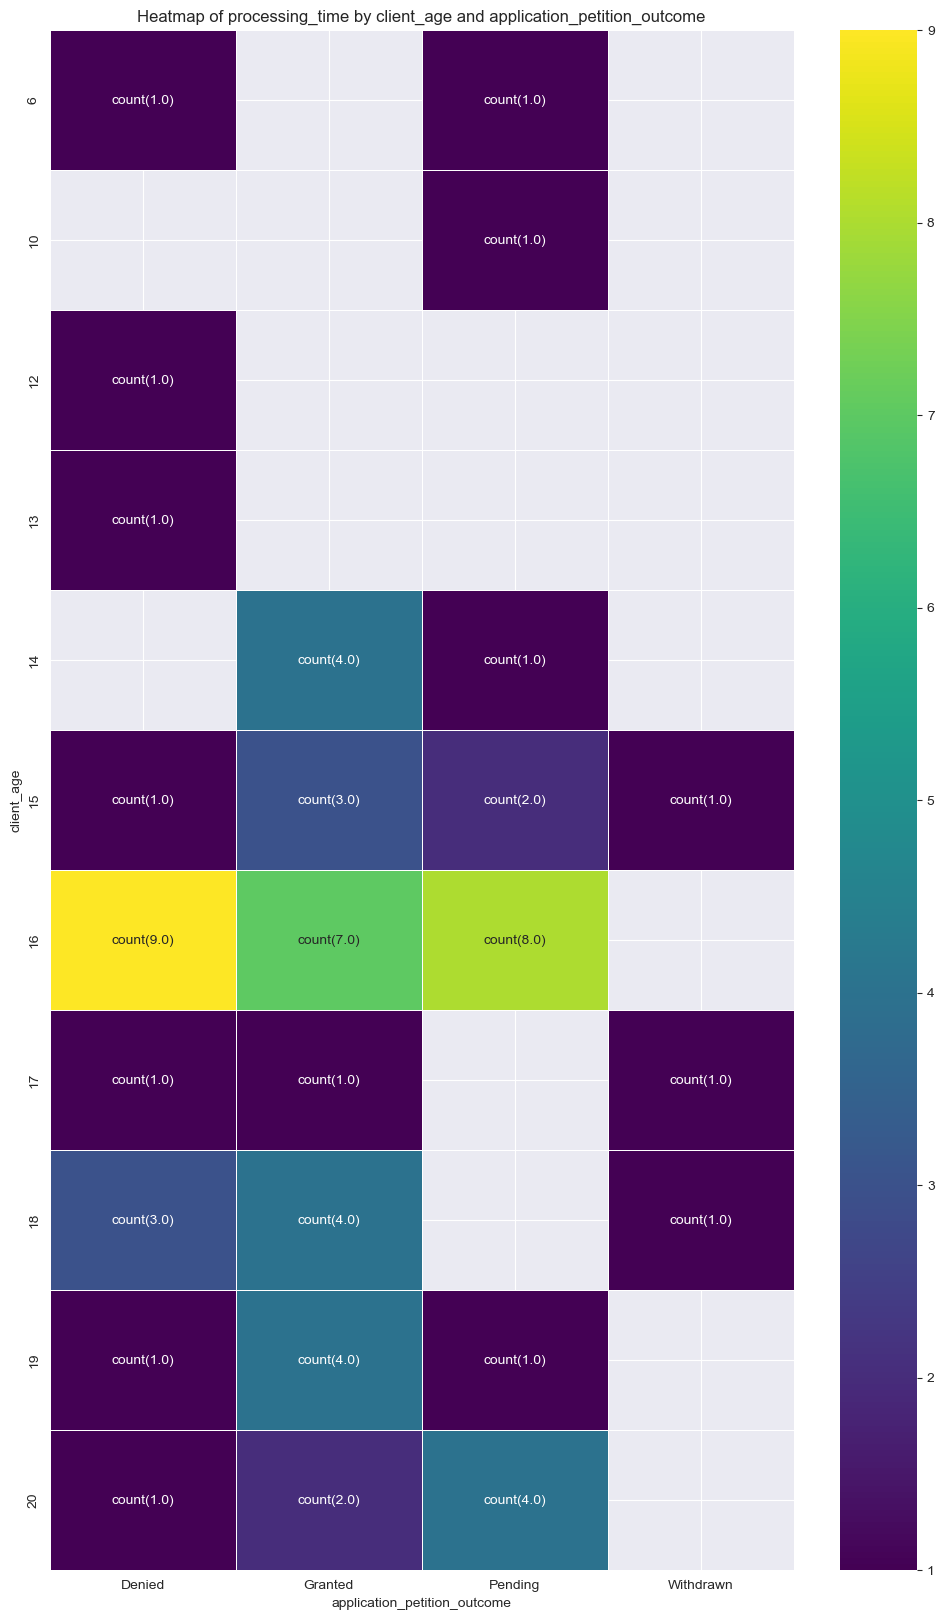

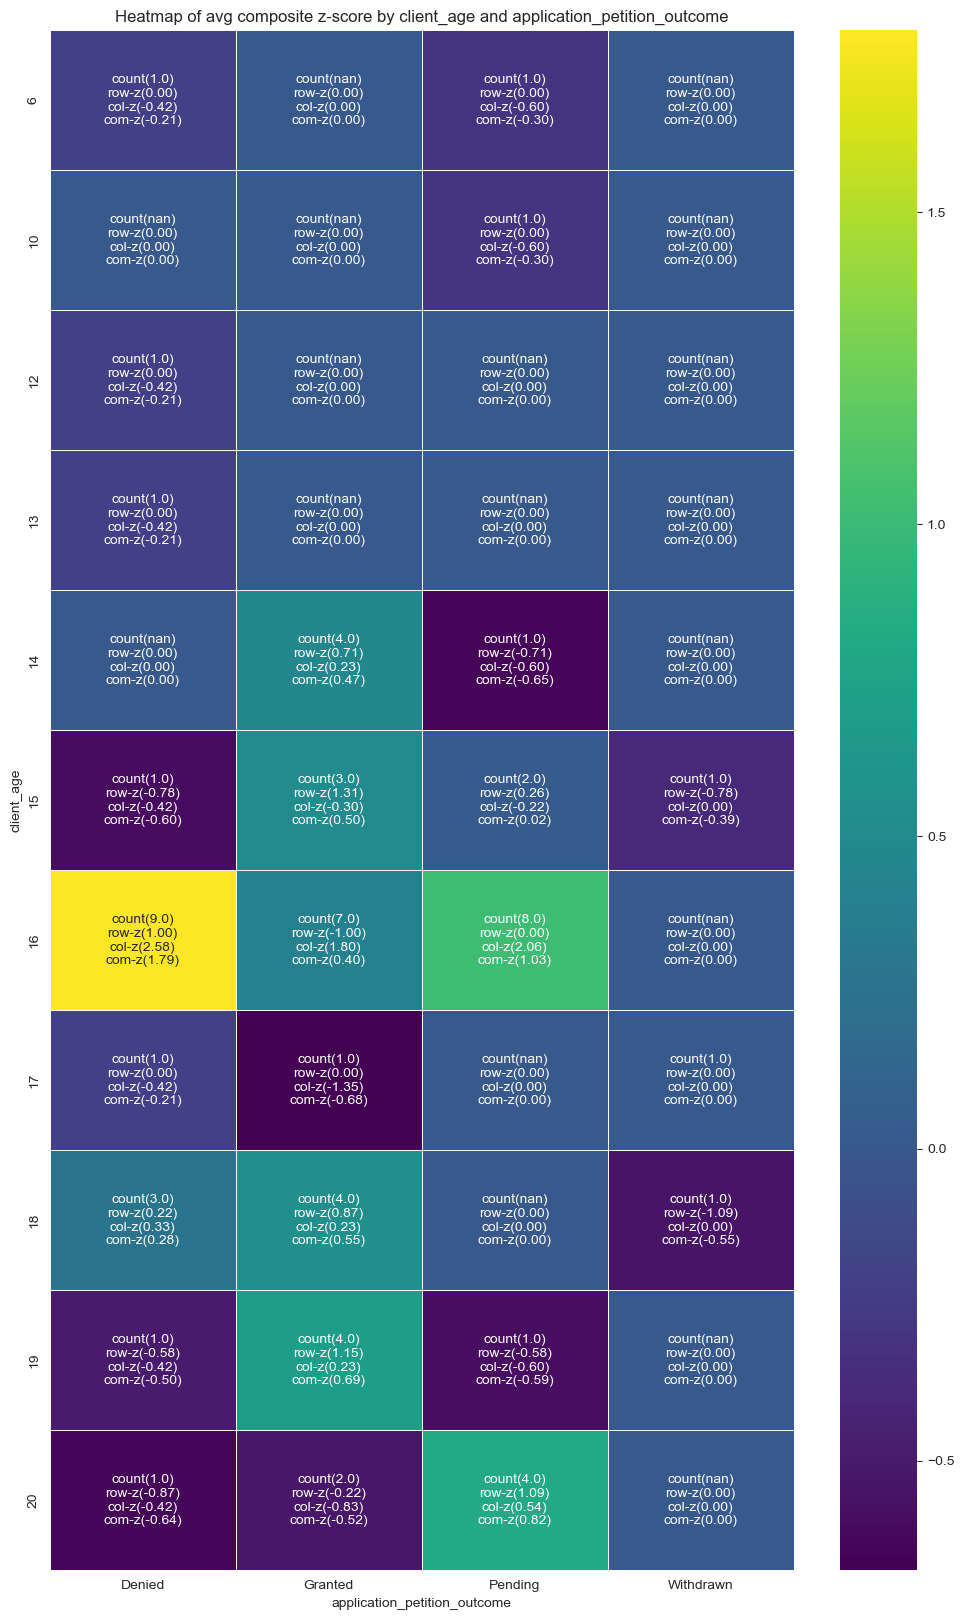

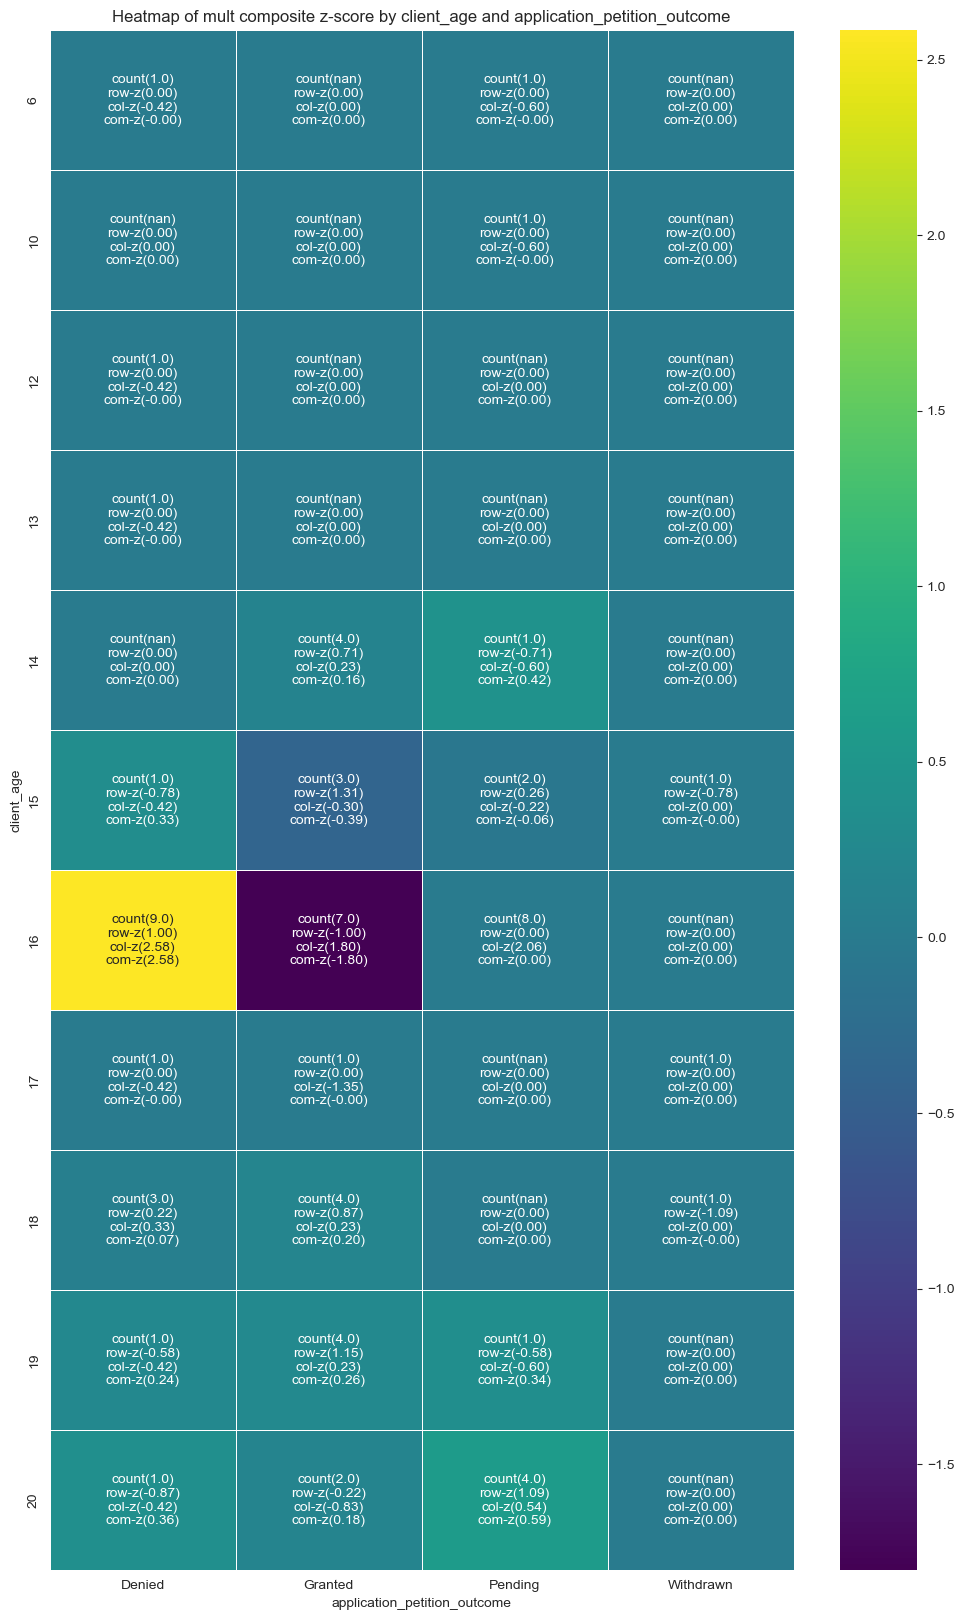

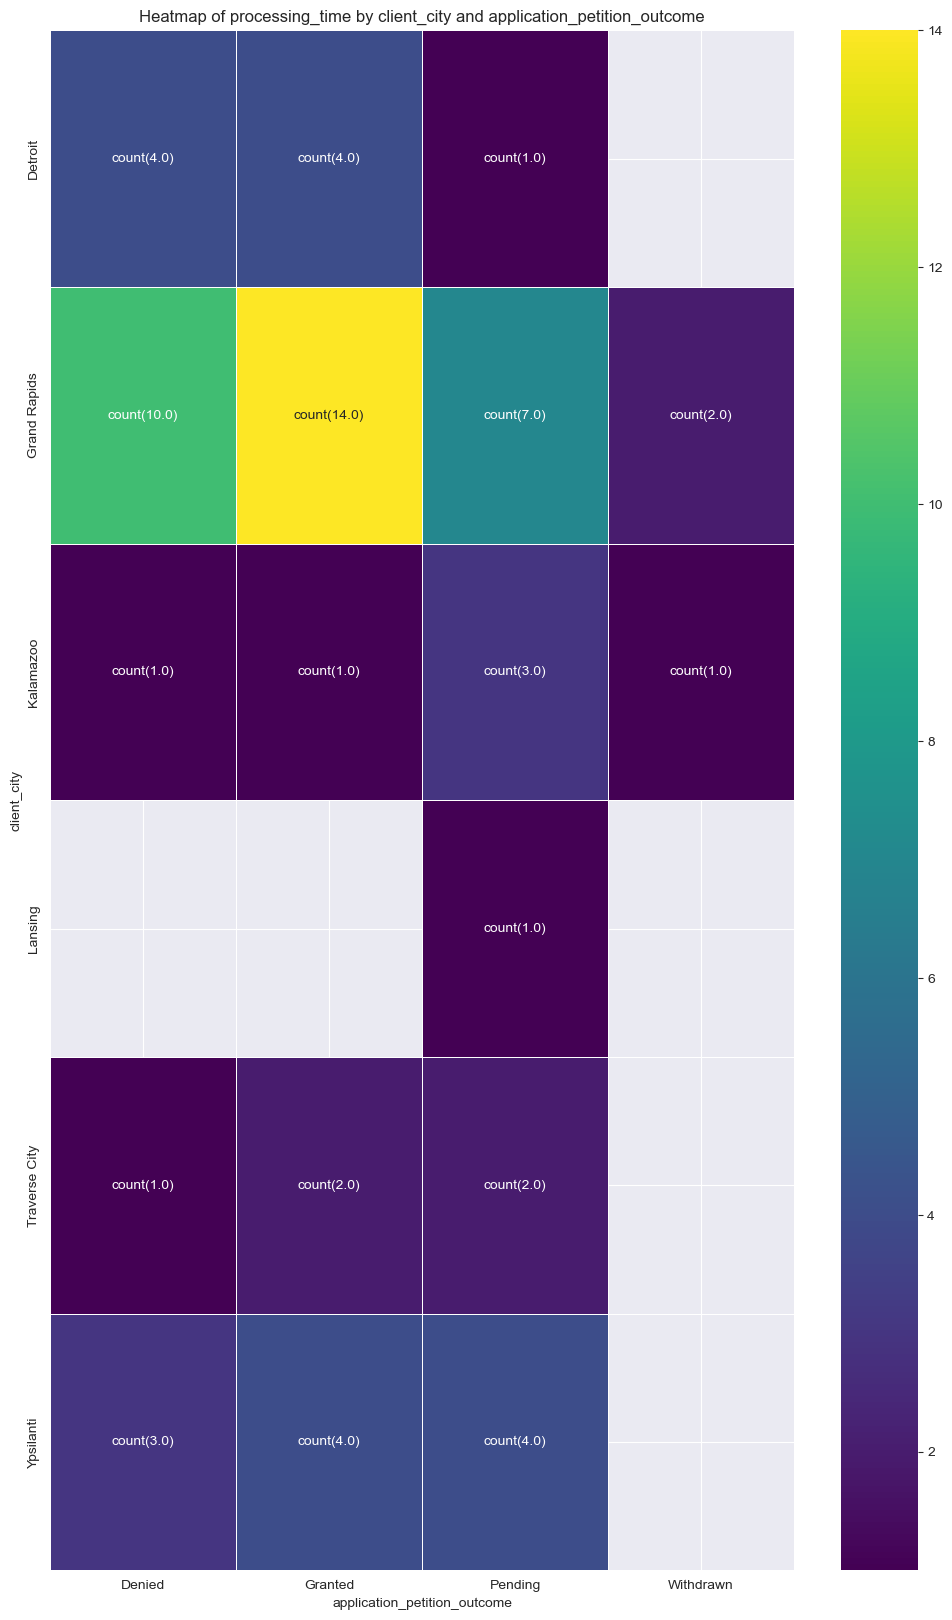

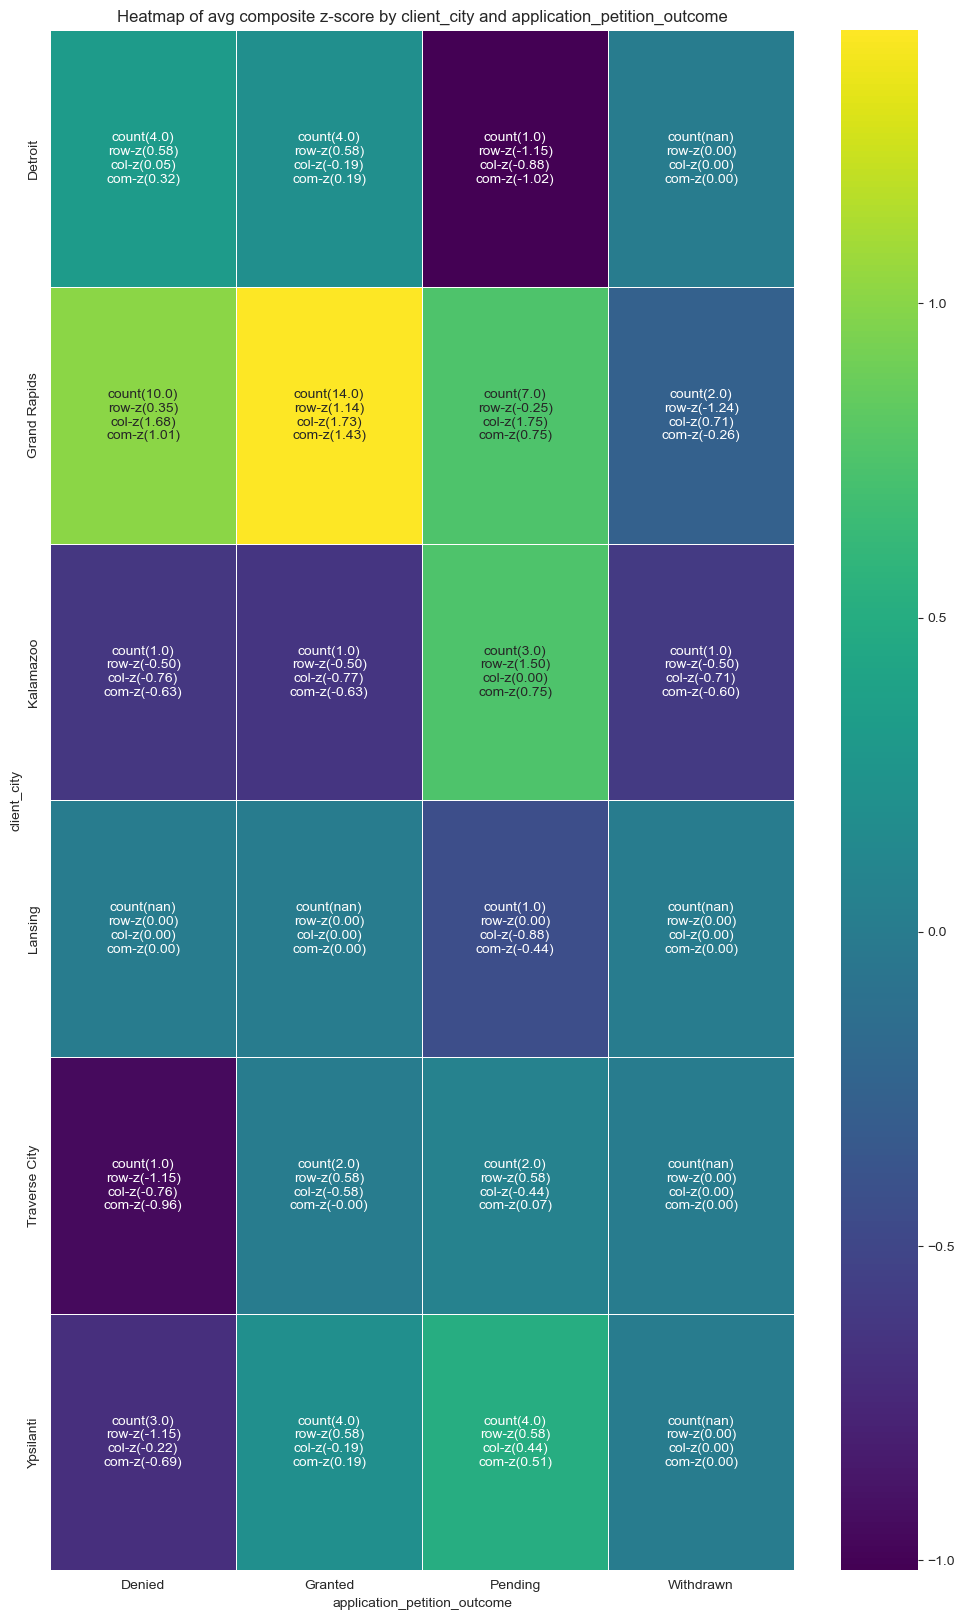

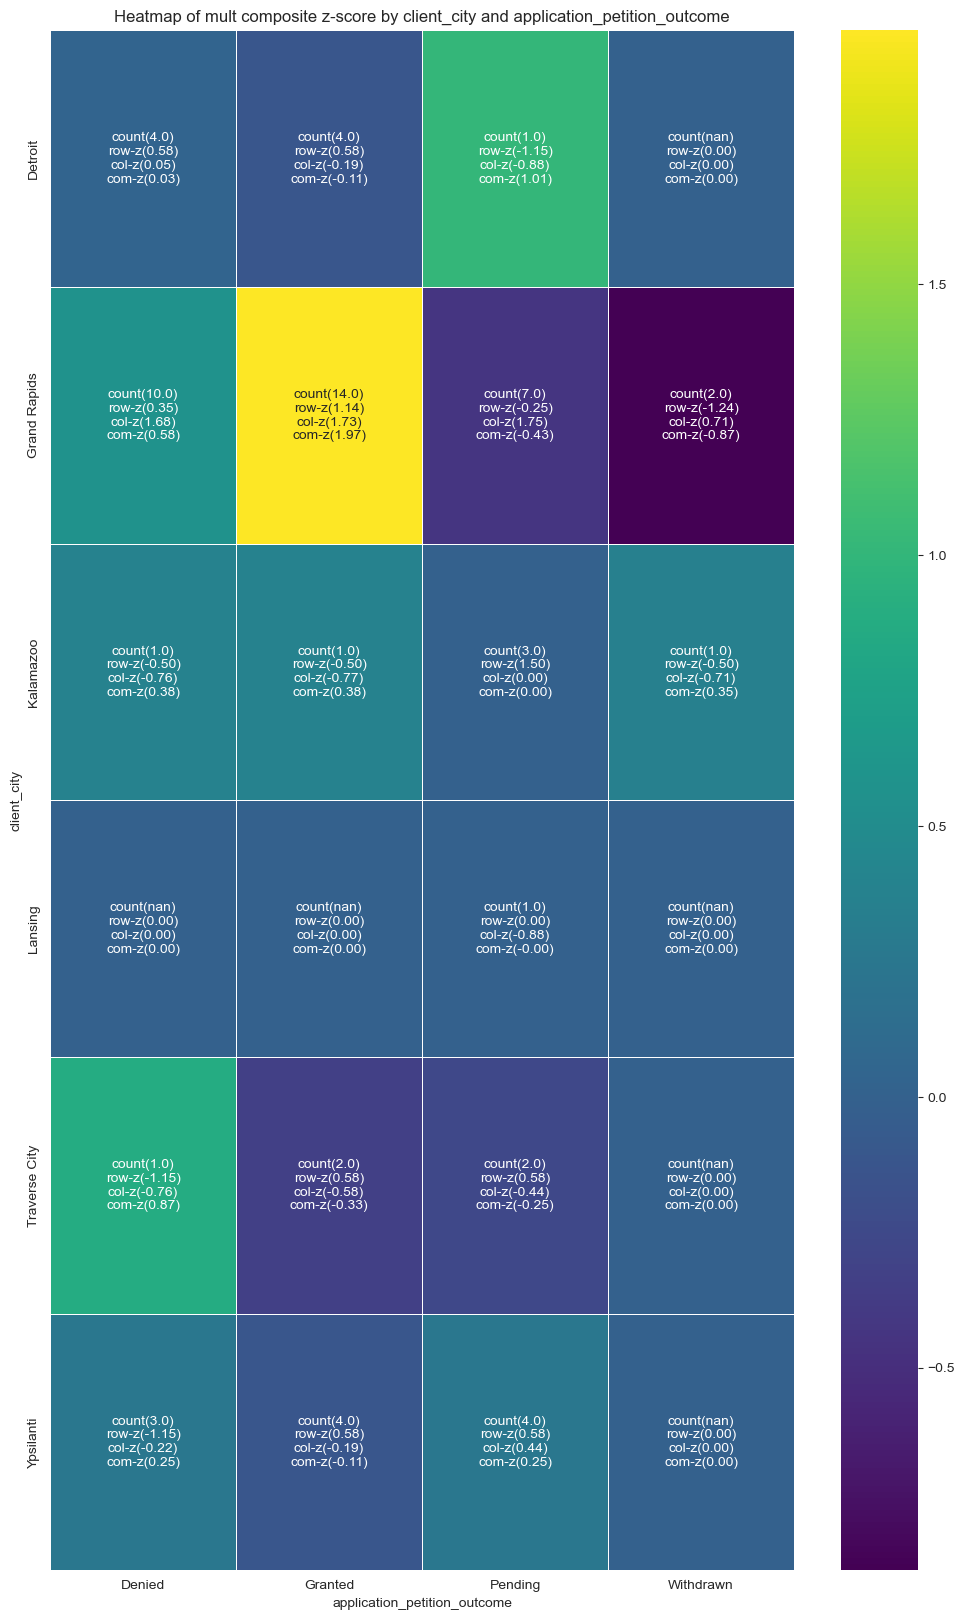

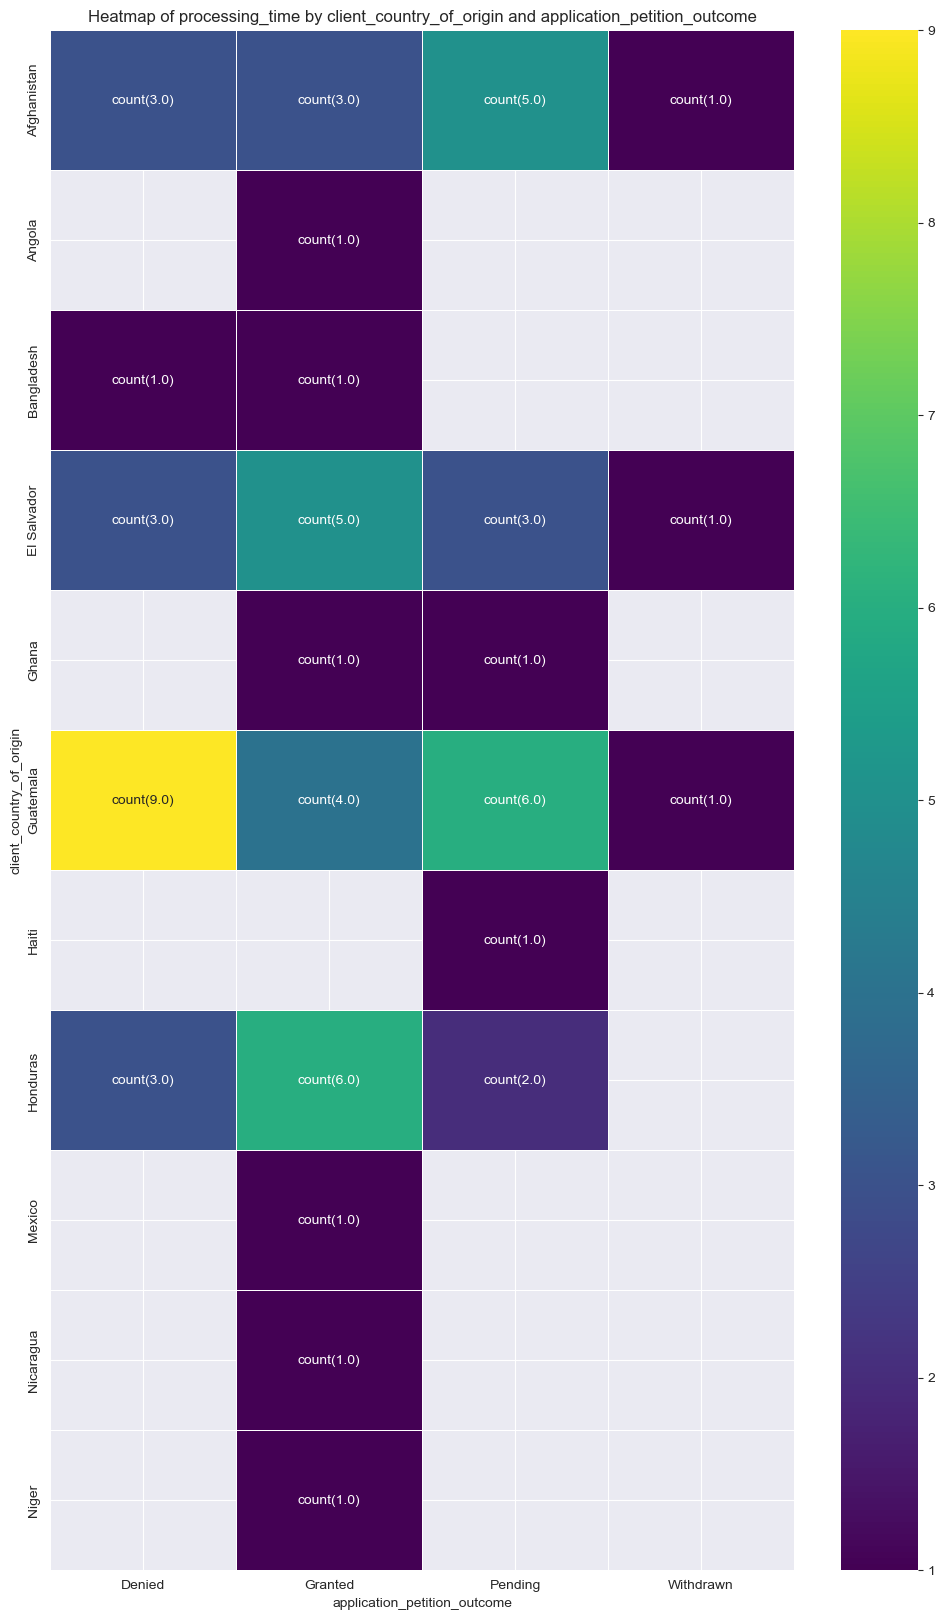

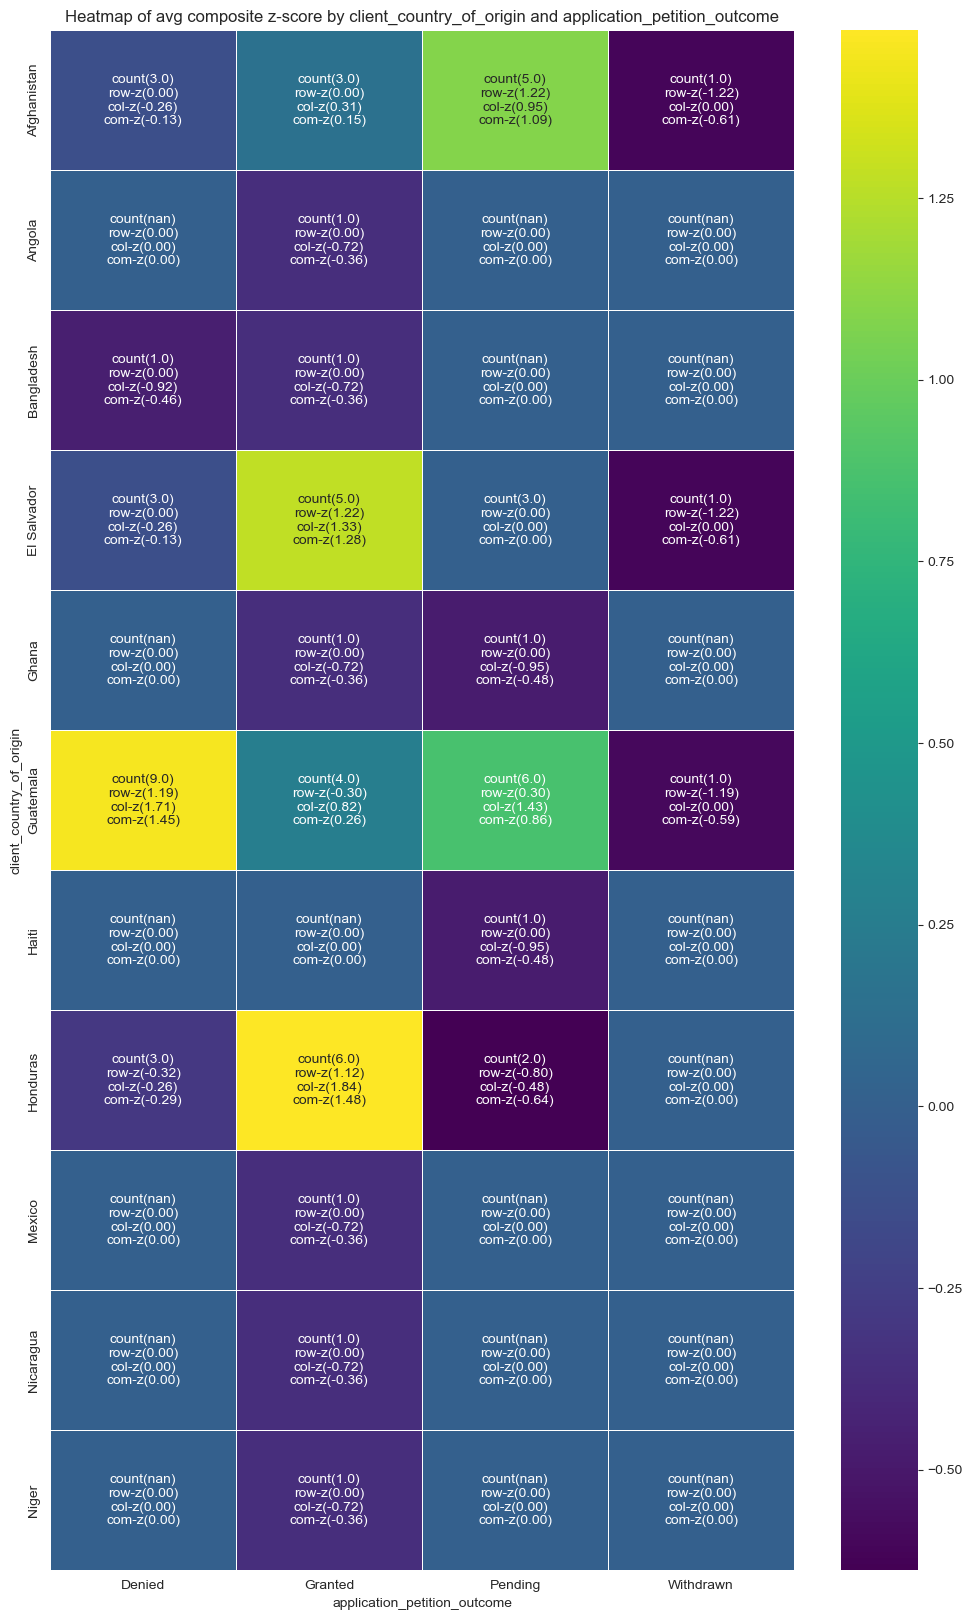

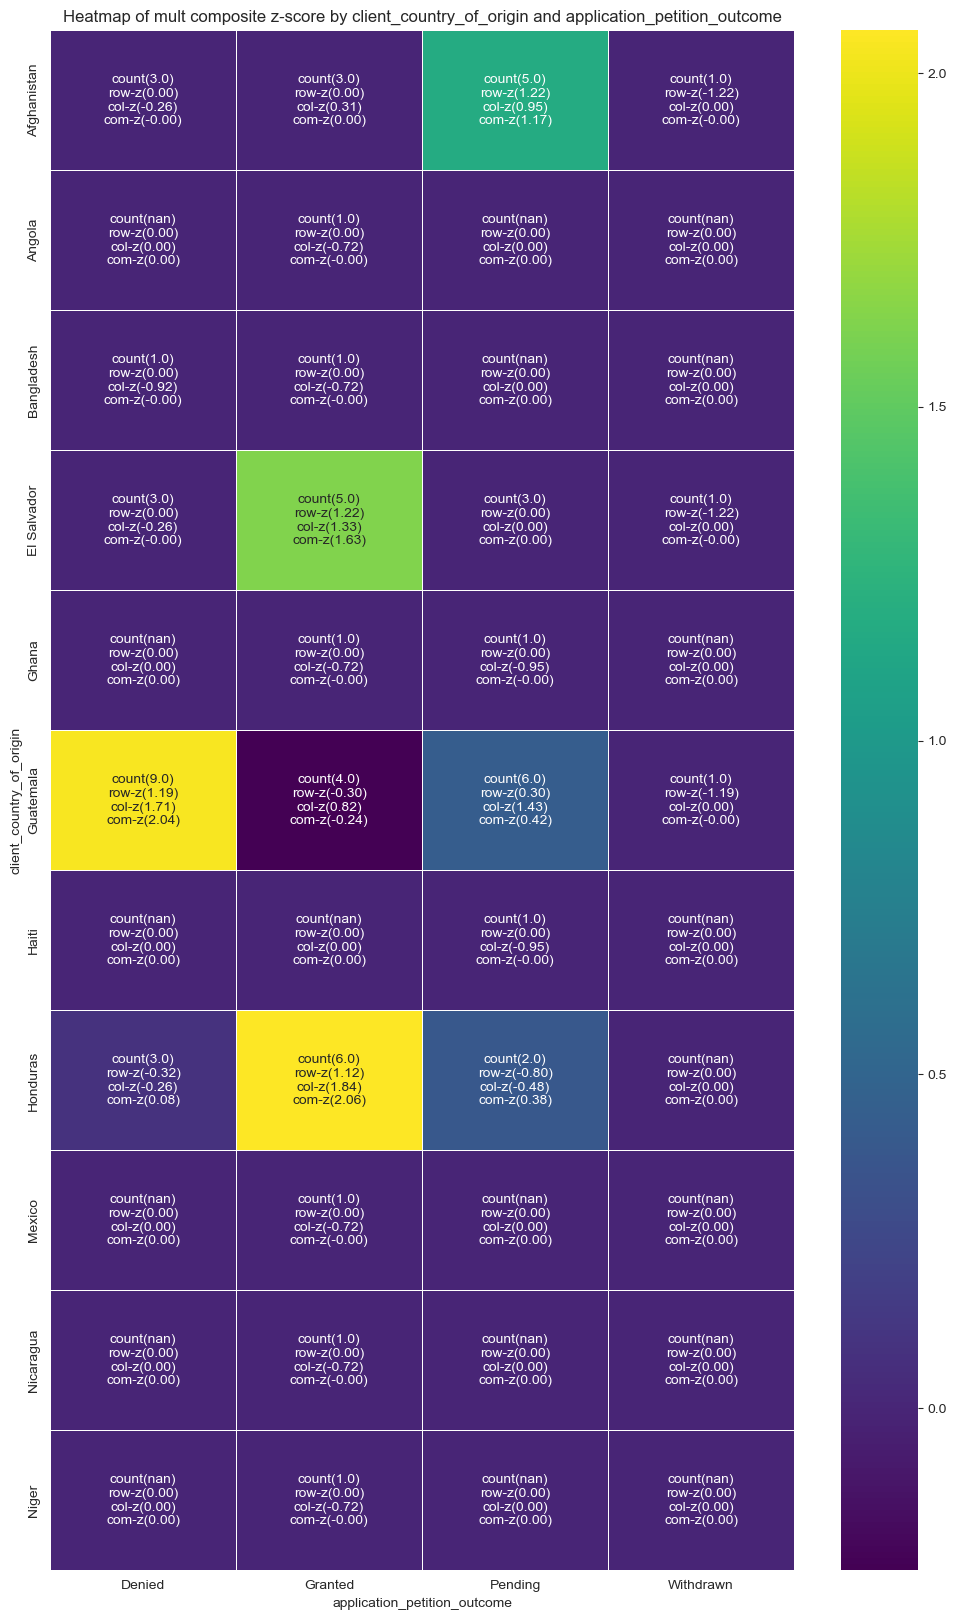

In [181]:
from scipy.stats import median_abs_deviation

def plot_z_score_heatmap(grouped_df, group_column='event_year_month', outcome_column='application_petition_outcome', value_column='processing_time', avg=True):
    count_groups = grouped_df.groupby([group_column, outcome_column])[value_column].count().unstack()
    
    # Calculate Z-Scores by row
    row_mean = count_groups.mean(axis=1)
    row_std = count_groups.std(axis=1)
    z_scores_by_row = (count_groups.sub(row_mean, axis=0)).div(row_std, axis=0)
    
    # Calculate Z-Scores by column
    col_mean = count_groups.mean(axis=0)
    col_std = count_groups.std(axis=0)
    z_scores_by_col = (count_groups.sub(col_mean, axis=1)).div(col_std, axis=1)
    
    # Replace NaN values with 0
    z_scores_by_row = z_scores_by_row.fillna(0)
    z_scores_by_col = z_scores_by_col.fillna(0)
    
    # Matrix Multiplication of Row and Column Z-Scores
    combined_z_scores = (z_scores_by_row.add(z_scores_by_col, fill_value=0)) / 2 if avg else z_scores_by_col.mul(z_scores_by_row)
    
    # Create a DataFrame for annotations
    annotations = pd.DataFrame(index=count_groups.index, columns=count_groups.columns)
    
    for x in count_groups.index:
        for y in count_groups.columns:
            # Get values
            count_value = count_groups.loc[x, y]
            z_score_by_row = z_scores_by_row.loc[x, y]
            z_score_by_col = z_scores_by_col.loc[x, y]
            combined_z_score = combined_z_scores.loc[x, y]
            
            # Format annotation text
            annotations.loc[x, y] = (
                f'count({count_value})\n'
                f'row-z({z_score_by_row:.2f})\n'
                f'col-z({z_score_by_col:.2f})\n'
                f'com-z({combined_z_score:.2f})'
            )
    
    # Plot a heatmap
    plt.figure(figsize=(12, 20))
    sns.heatmap(combined_z_scores, annot=annotations, fmt="", cmap='viridis', linewidths=.5)
    plt.title(f'Heatmap of {'avg' if avg else 'mult'} composite z-score by {group_column} and {outcome_column}')
    plt.xlabel(outcome_column)
    plt.ylabel(group_column)
    plt.show()


def plot_count_heatmap(grouped_df, group_column='event_year_month', outcome_column='application_petition_outcome', value_column='processing_time'):
    count_groups = grouped_df.groupby([group_column, outcome_column])[value_column].count().unstack()

    # Create a DataFrame for annotations
    annotations = pd.DataFrame(index=count_groups.index, columns=count_groups.columns)
    
    for x in count_groups.index:
        for y in count_groups.columns:
            # Get values
            count_value = count_groups.loc[x, y]

            # Format annotation text
            annotations.loc[x, y] = f'count({count_value})'
    
    # Plot a heatmap
    plt.figure(figsize=(12, 20))
    sns.heatmap(count_groups, annot=annotations, fmt="", cmap='viridis', linewidths=.5)
    plt.title(f'Heatmap of {value_column} by {group_column} and {outcome_column}')
    plt.xlabel(outcome_column)
    plt.ylabel(group_column)
    plt.show()

# Example usage:
plot_count_heatmap(exercise_2_df, group_column='event_year_month')

plot_count_heatmap(exercise_2_df, group_column='client_age')
plot_z_score_heatmap(exercise_2_df, group_column='client_age')
plot_z_score_heatmap(exercise_2_df, group_column='client_age', avg=False)


plot_count_heatmap(exercise_2_df, group_column='client_city')
plot_z_score_heatmap(exercise_2_df, group_column='client_city')
plot_z_score_heatmap(exercise_2_df, group_column='client_city', avg=False)


plot_count_heatmap(exercise_2_df, group_column='client_country_of_origin')
plot_z_score_heatmap(exercise_2_df, group_column='client_country_of_origin')
plot_z_score_heatmap(exercise_2_df, group_column='client_country_of_origin', avg=False)


# plot_count_heatmap(exercise_2_df, group_column='client_city')

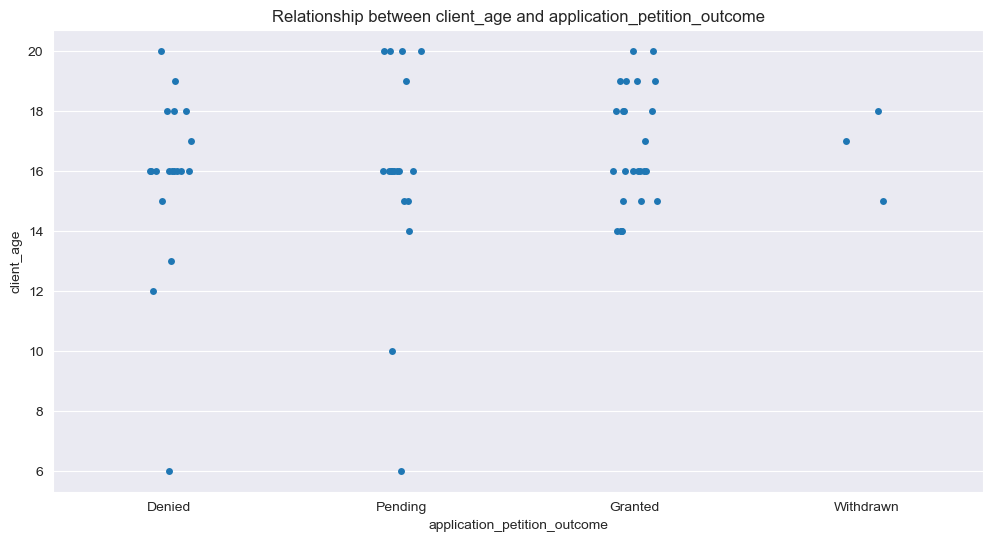

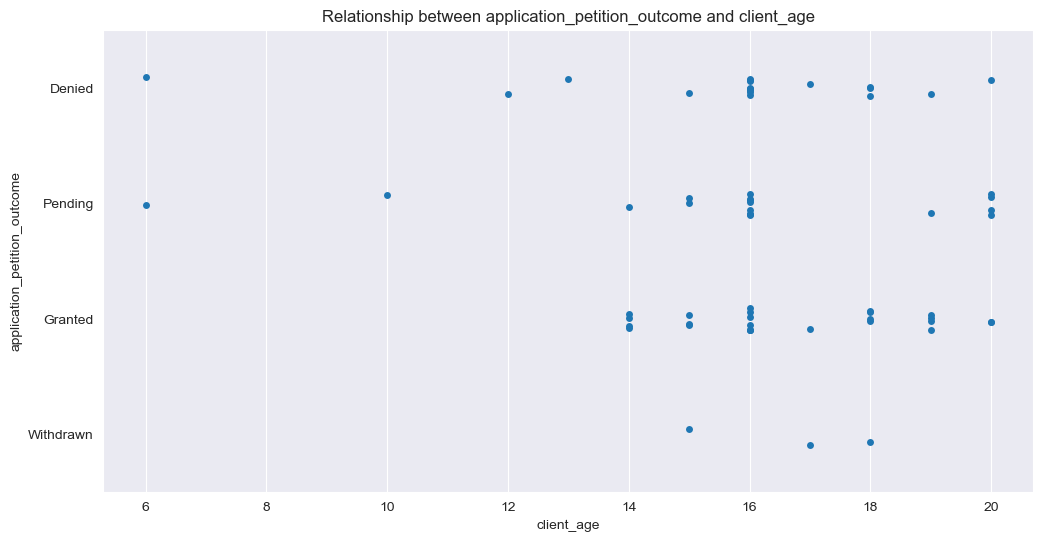

In [182]:
def plot_jitter_scatter_plot(grouped_df, x='application_petition_outcome', y='client_age'):
    plt.figure(figsize=(12, 6))
    sns.stripplot(x=x, y=y, data=grouped_df, jitter=True)
    plt.title(f'Relationship between {y} and {x}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    
plot_jitter_scatter_plot(exercise_2_df)
plot_jitter_scatter_plot(exercise_2_df, x='client_age', y='application_petition_outcome')

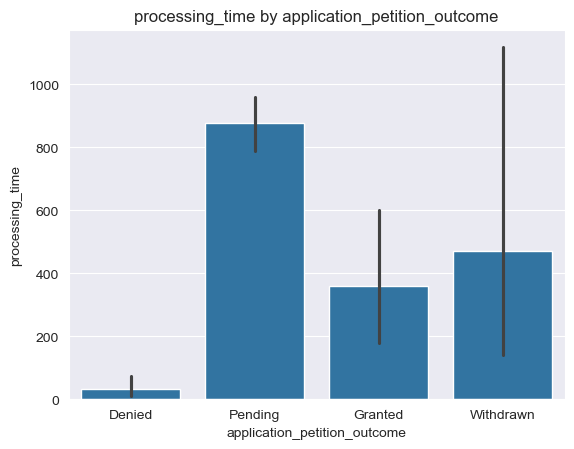

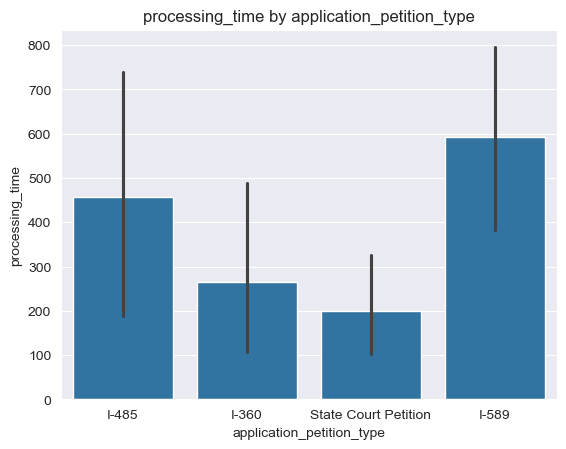

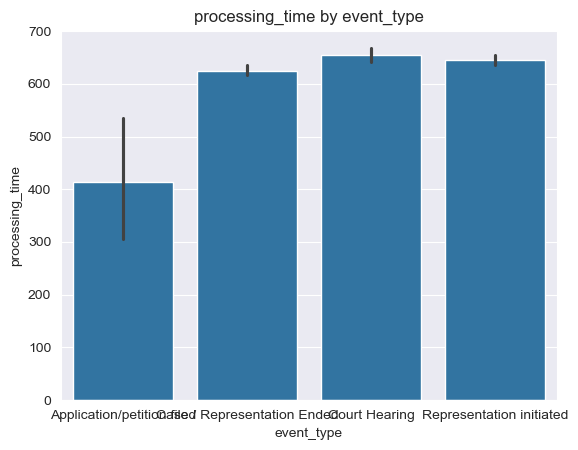

In [104]:
def violin_plot(grouped_df, column='processing_time', by='application_petition_outcome'):
    # Create the violin plot
    sns.violinplot(x=by, y=column, data=grouped_df)
    plt.title(f'{column} by {by}')
    plt.suptitle('')
    plt.xlabel(by)
    plt.ylabel(column)
    plt.show()
    
def bar_plot(grouped_df, column='processing_time', by='application_petition_outcome'):
    # Create the violin plot
    sns.barplot(x=by, y=column, data=grouped_df)
    plt.title(f'{column} by {by}')
    plt.suptitle('')
    plt.xlabel(by)
    plt.ylabel(column)
    plt.show()
    
bar_plot(exercise_2_df)
bar_plot(exercise_2_df, by='application_petition_type')
bar_plot(exercise_2_df, by='event_type')

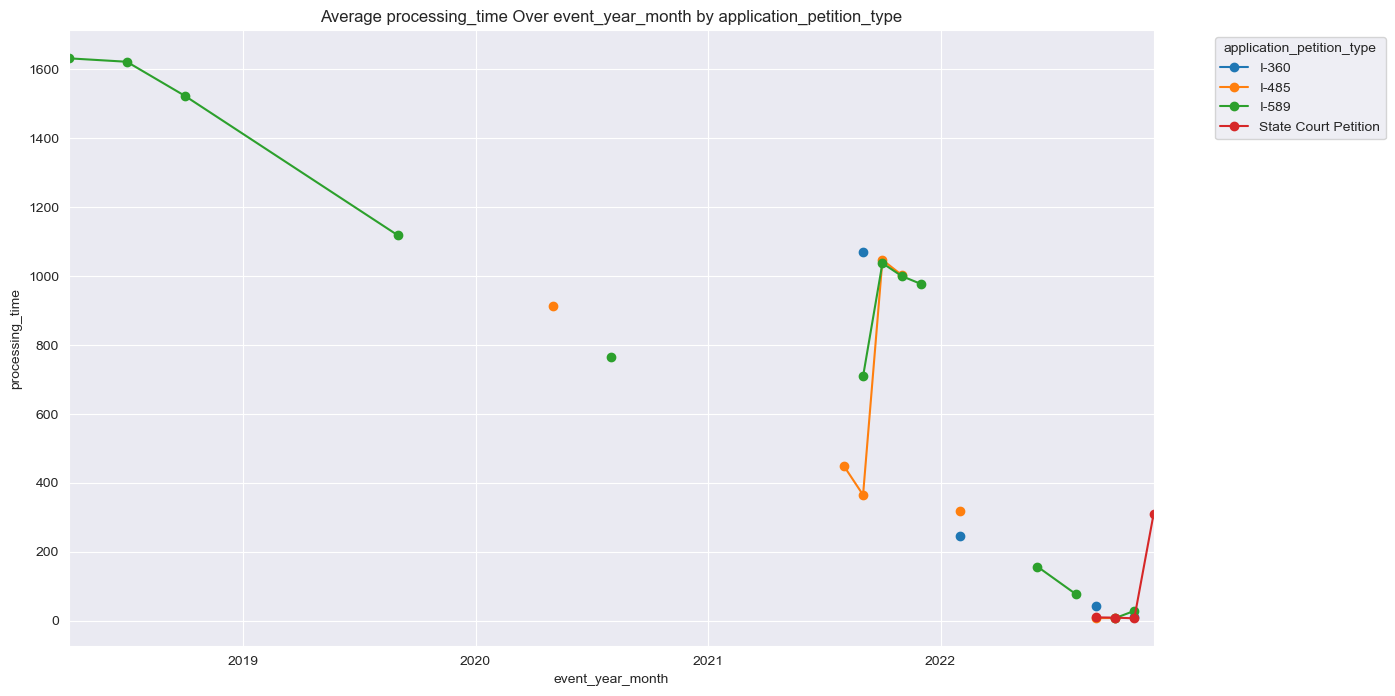

In [105]:
# Cell 6: Advanced Analysis
# Explore specific trends or patterns related to your goals (e.g., trends over time, impact of certain features).

def plot_trend(grouped_df, group_column='event_year_month', outcome_column='application_petition_outcome', value_column='processing_time'):
    # Calculate the average processing time per year and event type
    avg_processing_time_per_year_and_type = grouped_df.groupby([group_column, outcome_column])[value_column].mean().unstack()
    
    # Plot the trend of Processing Time over the years for each event type
    plt.figure(figsize=(14, 8))
    avg_processing_time_per_year_and_type.plot(kind='line', marker='o', ax=plt.gca())
    plt.title(f'Average {value_column} Over {group_column} by {outcome_column}')
    plt.xlabel(group_column)
    plt.ylabel(value_column)
    plt.grid(True)
    plt.legend(title=outcome_column, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
plot_trend(exercise_2_df, outcome_column='application_petition_type')


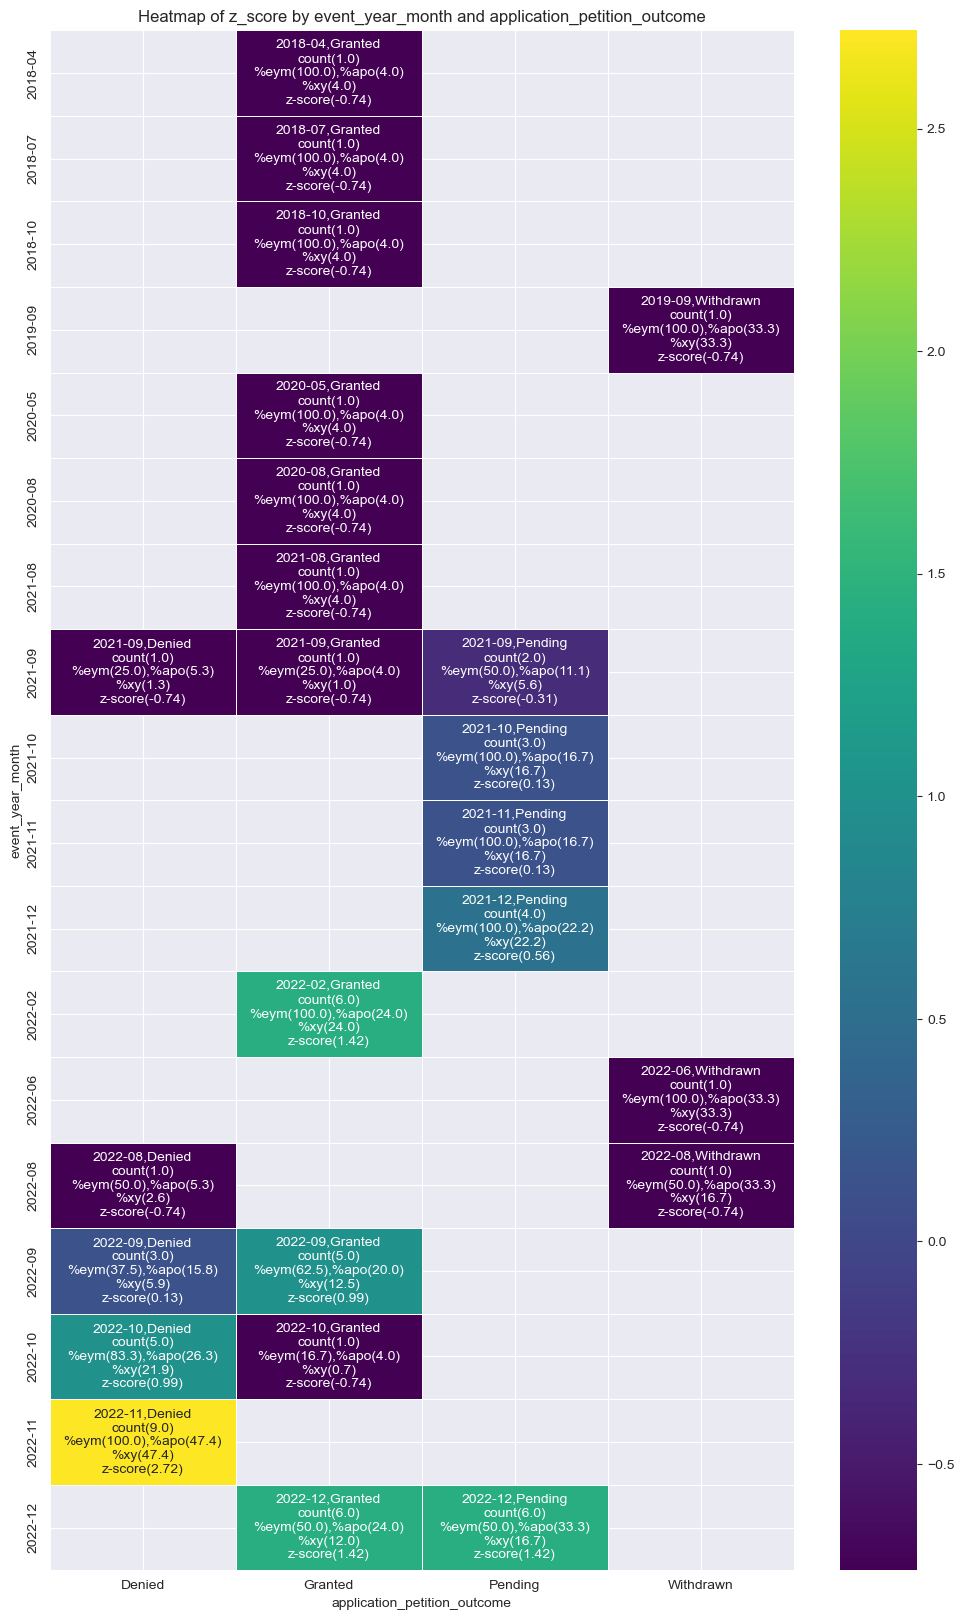

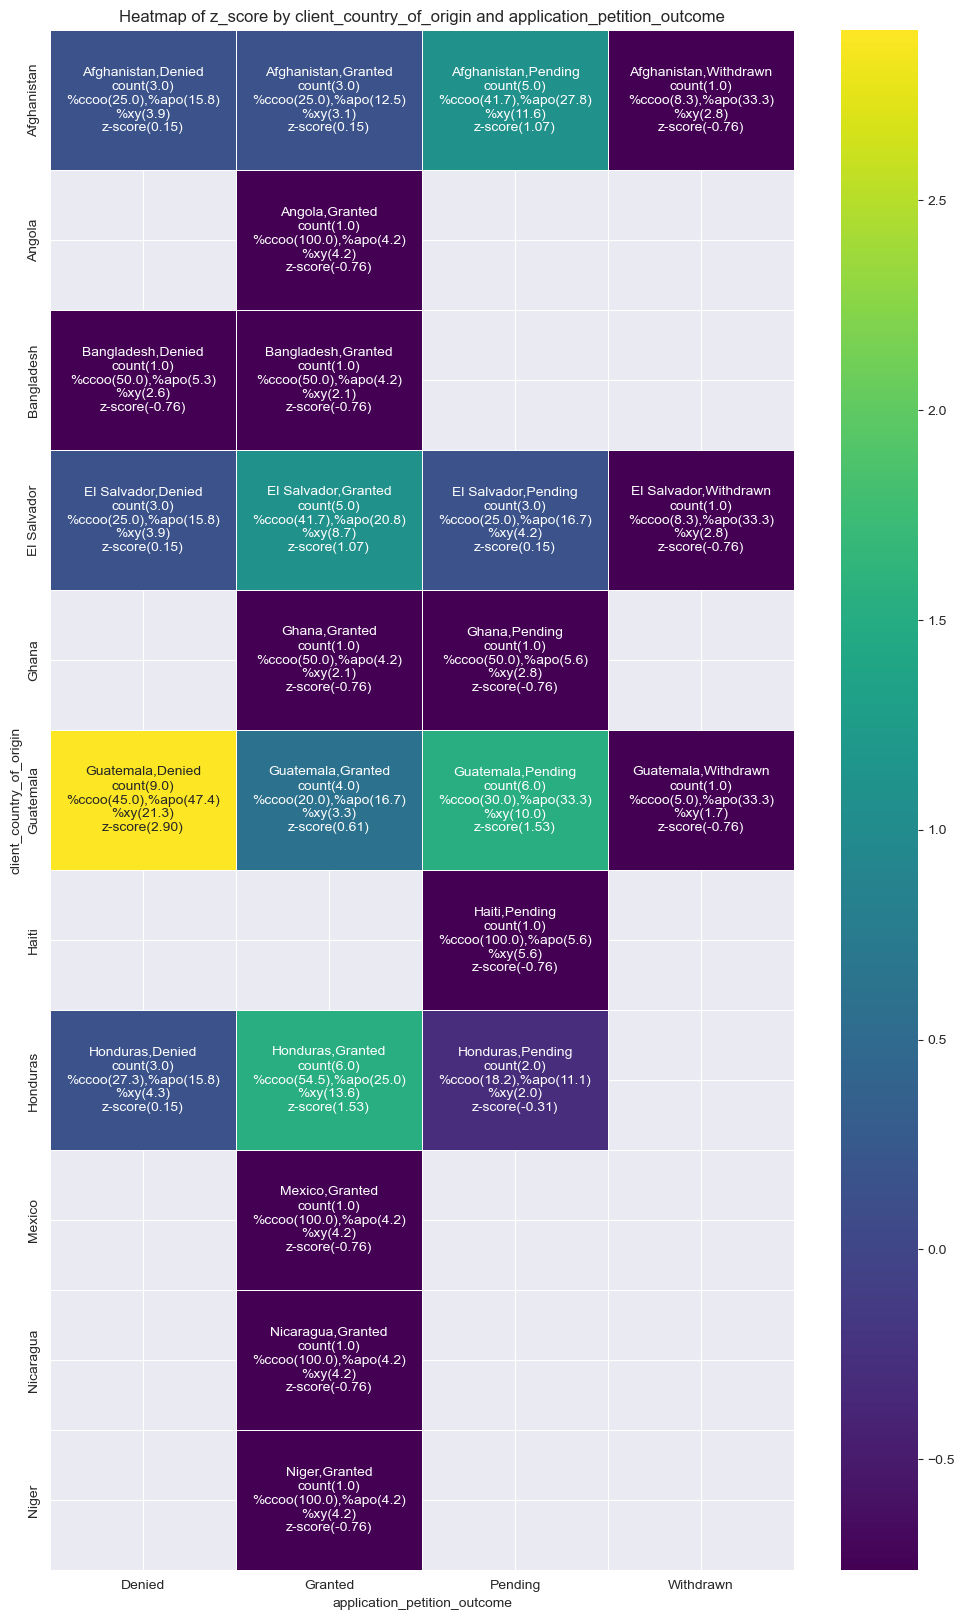

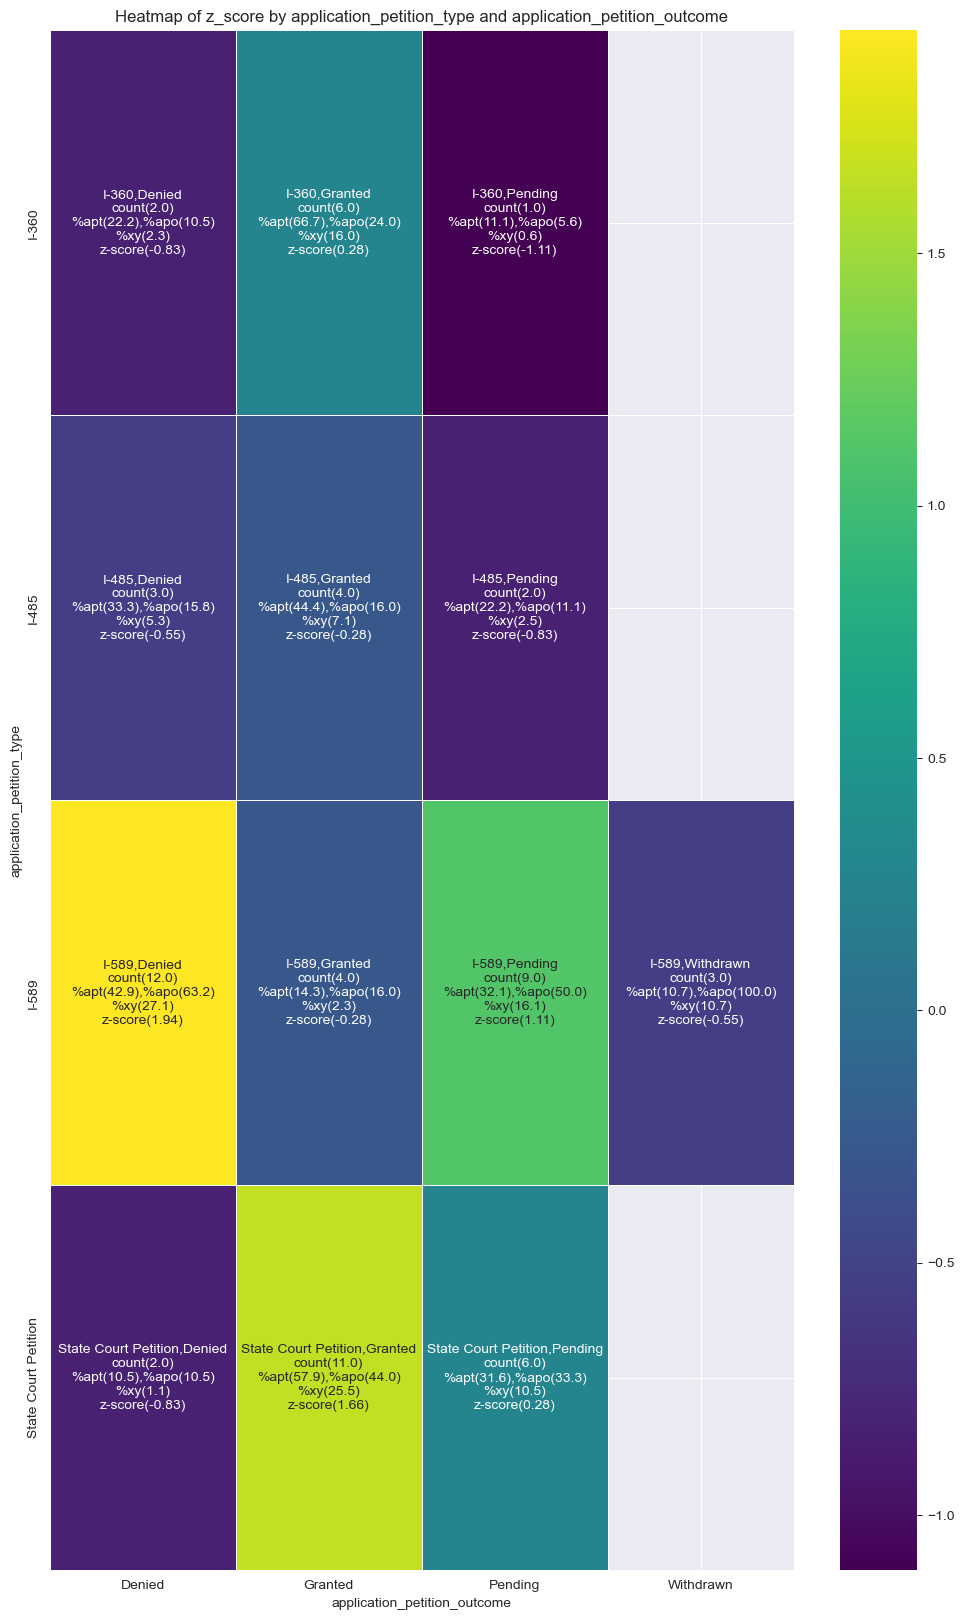

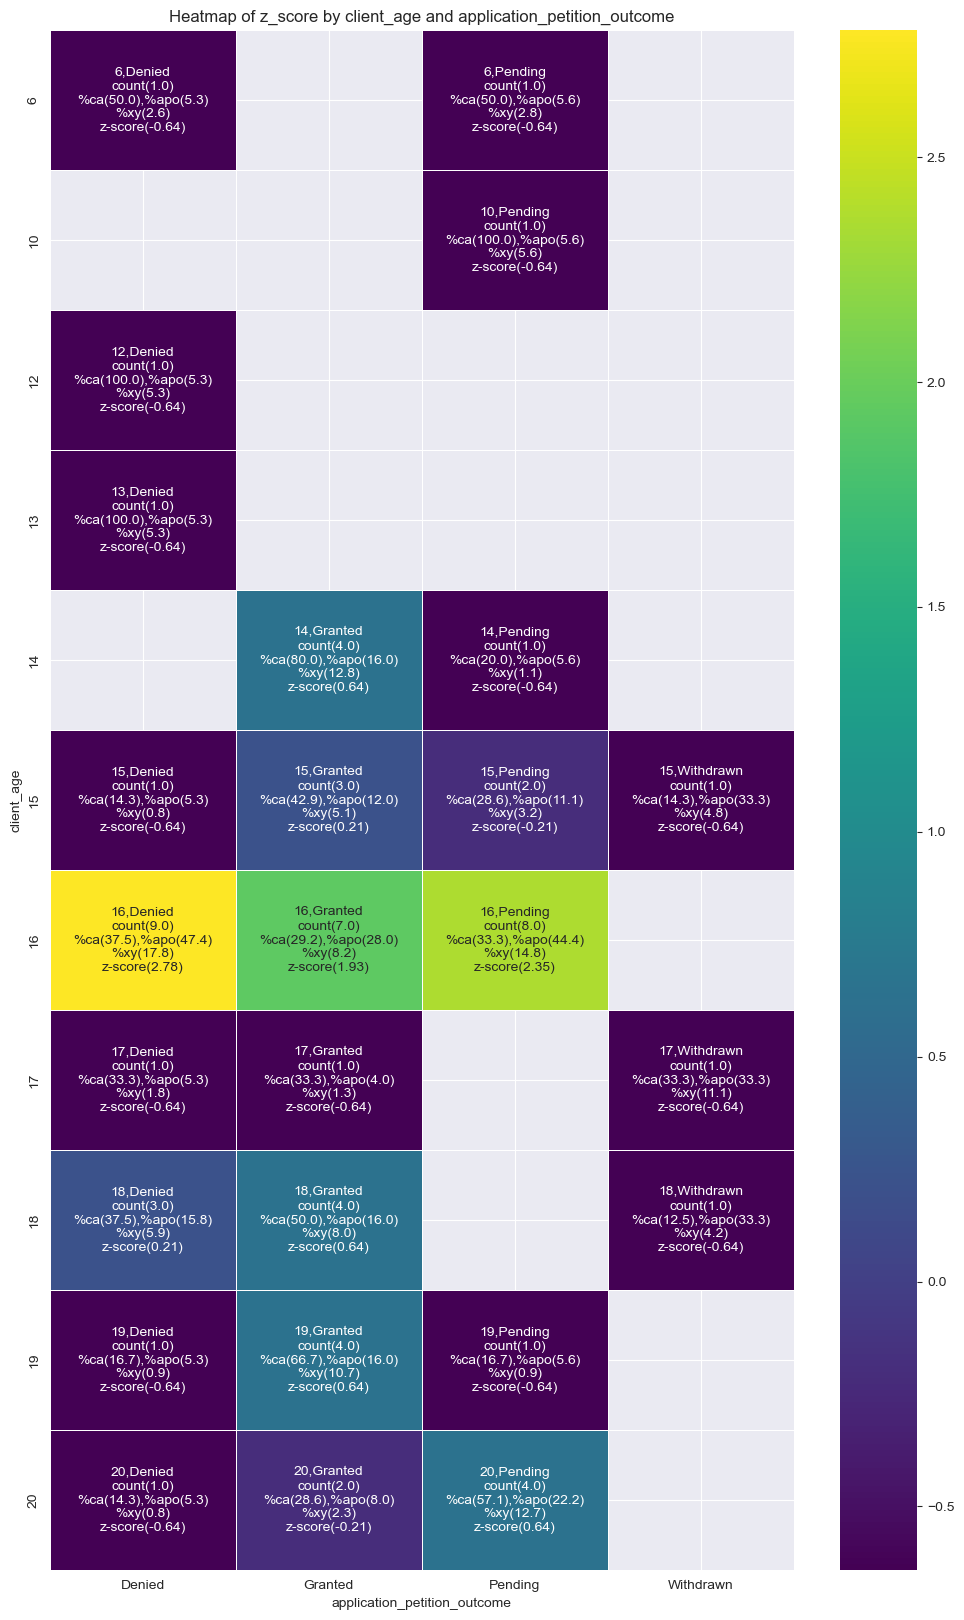

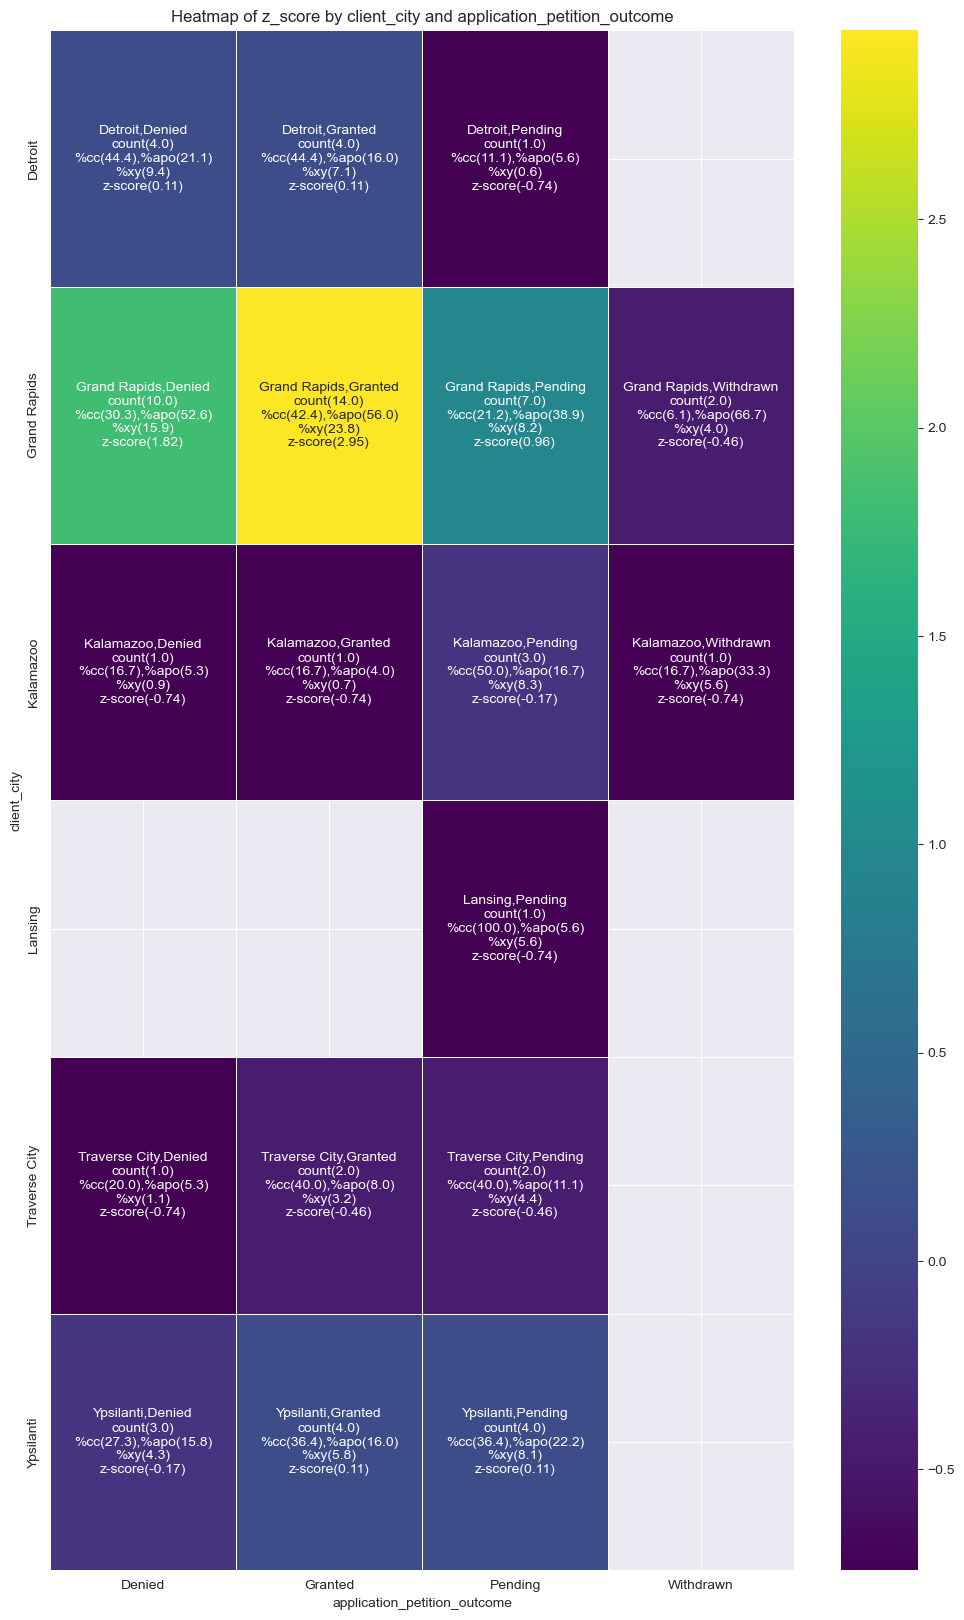

In [106]:
import matplotlib.pyplot as plt

def plot_z_score_heatmap(grouped_df, group_column='event_year_month', outcome_column='application_petition_outcome'):
    def generate_abbreviation(column_name):
        # Normalize column name by replacing underscores and converting to lowercase
        normalized_name = column_name.replace('_', ' ').lower()
        
        # Split the normalized name into words
        words = normalized_name.split()
        
        # Generate abbreviation by taking the first letter of each word
        abbreviation = ''.join(word[0] for word in words)
        
        # Return the generated abbreviation
        return abbreviation
    
    count_per_group = grouped_df.groupby([group_column, outcome_column])['processing_time'].count().unstack()
    
    # Calculate Z-Scores
    overall_mean = count_per_group.stack().mean()
    overall_std = count_per_group.stack().std()
    z_scores = (count_per_group - overall_mean) / overall_std
    
    # Calculate percentages relative to the total count in each group (x and y axes)
    percentage_x = count_per_group.div(count_per_group.sum(axis=1), axis=0) * 100
    percentage_y = count_per_group.div(count_per_group.sum(axis=0), axis=1) * 100
    
    # Calculate the new value as the product of x and y percentages
    percentage_xy = percentage_x.mul(percentage_y, fill_value=0) / 100

    # Create a DataFrame to hold annotations
    annotations = pd.DataFrame(index=z_scores.index, columns=z_scores.columns)
    
    for x in z_scores.index:
        for y in z_scores.columns:
            # Get group keys
            group_key_x = x
            group_key_y = y
            
            # Get statistics
            count_value = count_per_group.loc[x, y]
            percent_x = percentage_x.loc[x, y].round(1)
            percent_y = percentage_y.loc[x, y].round(1)
            percent_xy = percentage_xy.loc[x, y].round(1)
            z_score = z_scores.loc[x, y].round(2)
            
            # Format annotation text
            annotations.loc[x, y] = (
                f'{group_key_x},{group_key_y}\n'
                f'count({count_value})\n'
                f'%{generate_abbreviation(group_column)}({percent_x:.1f}),'
                f'%{generate_abbreviation(outcome_column)}({percent_y:.1f})\n'
                f'%xy({percent_xy:.1f})\n'
                f'z-score({z_score:.2f})'
            )
    
    # Plot a heatmap
    plt.figure(figsize=(12, 20))
    sns.heatmap(z_scores, annot=annotations, fmt="", cmap='viridis', linewidths=.5)
    plt.title(f'Heatmap of z_score by {group_column} and {outcome_column}')
    plt.xlabel(outcome_column)
    plt.ylabel(group_column)
    plt.show()
    
def plot_processing_time_heatmap(grouped_df, group_column='event_year_month', outcome_column='application_petition_outcome', value_column='processing_time'):
    def generate_abbreviation(column_name):
        # Normalize column name by replacing underscores and converting to lowercase
        normalized_name = column_name.replace('_', ' ').lower()
        
        # Split the normalized name into words
        words = normalized_name.split()
        
        # Generate abbreviation by taking the first letter of each word
        abbreviation = ''.join(word[0] for word in words)
        
        # Return the generated abbreviation
        return abbreviation
    
    # Calculate the average processing time per year and outcome
    avg_processing_time = grouped_df.groupby([group_column, outcome_column])[value_column].mean().unstack()
    std_dev_processing_time = grouped_df.groupby([group_column, outcome_column])[value_column].std().unstack()
    # Calculate the count of records per year and outcome
    count_per_group = grouped_df.groupby([group_column, outcome_column])[value_column].count().unstack()
    
    # Calculate Z-Scores
    overall_mean = count_per_group.stack().mean()
    overall_std = count_per_group.stack().std()
    z_scores = (count_per_group - overall_mean) / overall_std
    
    # Calculate percentages relative to the total count in each group (x and y axes)
    percentage_x = count_per_group.div(count_per_group.sum(axis=1), axis=0) * 100
    percentage_y = count_per_group.div(count_per_group.sum(axis=0), axis=1) * 100
    
    # Calculate the new value as the product of x and y percentages
    percentage_xy = percentage_x.mul(percentage_y, fill_value=0) / 100

      
    # Create a DataFrame to hold annotations
    annotations = pd.DataFrame(index=avg_processing_time.index, columns=avg_processing_time.columns)
    
    for x in avg_processing_time.index:
        for y in avg_processing_time.columns:
            # Get group keys
            group_key_x = x
            group_key_y = y
            
            # Get statistics
            avg_value = avg_processing_time.loc[x, y]
            count_value = count_per_group.loc[x, y]
            std_dev_value = std_dev_processing_time.loc[x, y].round(2) if not pd.isna(std_dev_processing_time.loc[x, y]) else 'N/A'
            percent_x = percentage_x.loc[x, y].round(1)
            percent_y = percentage_y.loc[x, y].round(1)
            percent_xy = percentage_xy.loc[x, y].round(1)
            z_score = z_scores.loc[x, y].round(2)
            
            # Format annotation text
            annotations.loc[x, y] = (
                f'{group_key_x}\n{group_key_y}\n'
                f'avg({avg_value:.2f})\n'
                f'std({std_dev_value})\n'
                f'count({count_value})\n'
                f'%{generate_abbreviation(group_column)}({percent_x:.1f})\n'
                f'%{generate_abbreviation(outcome_column)}({percent_y:.1f})\n'
                f'%xy({percent_xy:.1f})\n'
                f'z-score({z_score:.2f})'
            )
    
    # Plot a heatmap
    plt.figure(figsize=(12, 30))
    sns.heatmap(z_scores, annot=annotations, fmt="", cmap='viridis', linewidths=.5)
    plt.title(f'Heatmap of {value_column} by {group_column} and {outcome_column}')
    plt.xlabel(outcome_column)
    plt.ylabel(group_column)
    plt.show()
    
plot_z_score_heatmap(exercise_2_df)
plot_z_score_heatmap(exercise_2_df, group_column='client_country_of_origin')
plot_z_score_heatmap(exercise_2_df, group_column='application_petition_type')

plot_z_score_heatmap(exercise_2_df, group_column='client_age')
plot_z_score_heatmap(exercise_2_df, group_column='client_city')



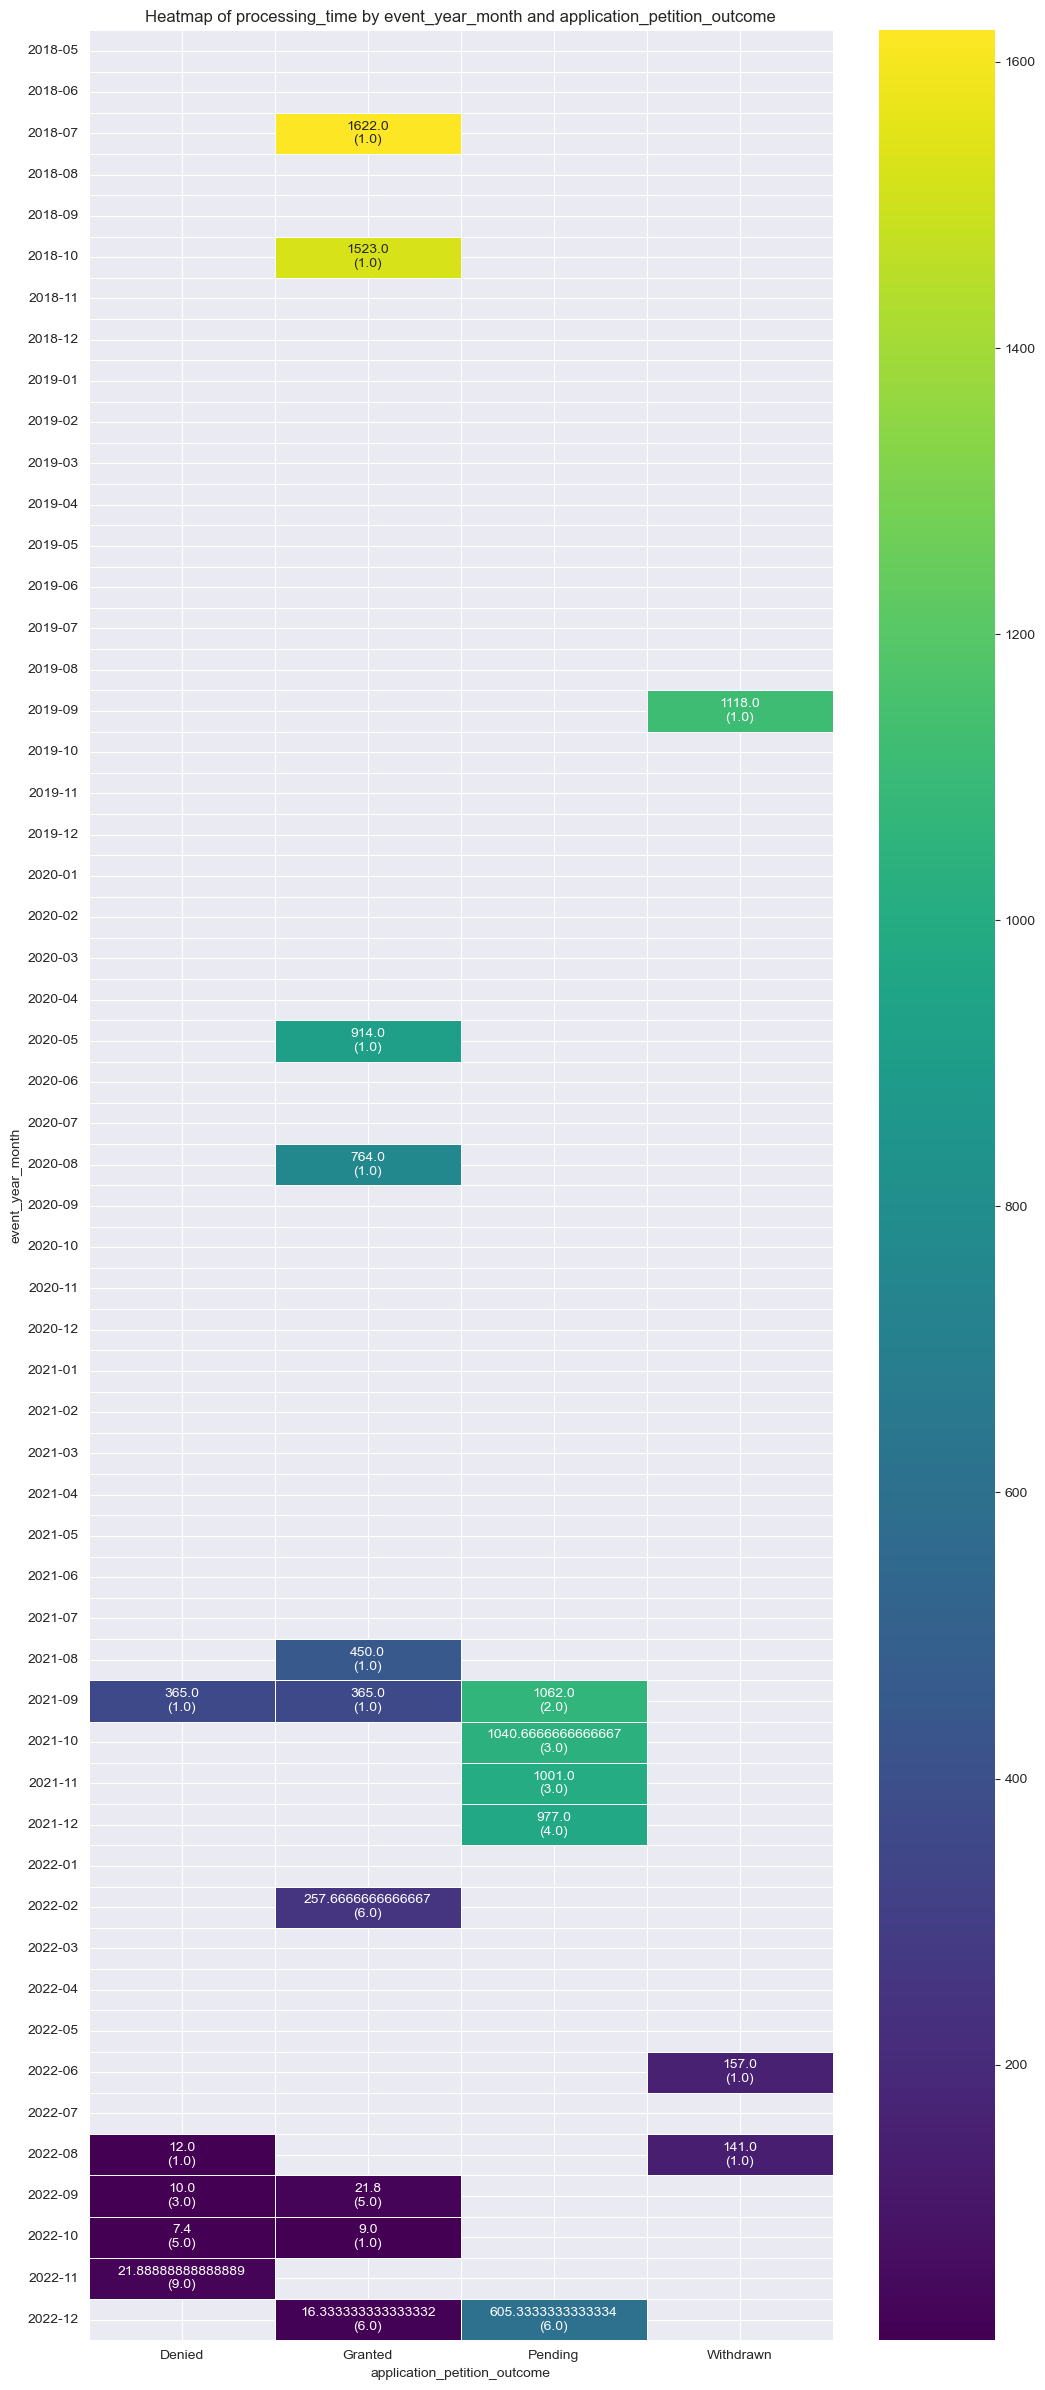

In [177]:
def plot_processing_time_heatmap_with_blanks(grouped_df, group_column='event_year_month', outcome_column='application_petition_outcome', value_column='processing_time'):
    # Create a list of all possible Year-Month combinations within the range of your data
    min_date = grouped_df['event_date'].min()
    max_date = grouped_df['event_date'].max()
    all_year_months = pd.date_range(start=min_date, end=max_date, freq='MS').strftime('%Y-%m').tolist()
    
    # Calculate the average processing time per year and outcome
    avg_processing_time = exercise_2_df.groupby([group_column, outcome_column])[value_column].mean().unstack()
    
    # Reindex to ensure all Year-Month combinations are present
    avg_processing_time = avg_processing_time.reindex(all_year_months, fill_value=np.nan)
    
    # Calculate the count of records per year and outcome
    count_per_group = exercise_2_df.groupby([group_column, outcome_column])[value_column].count().unstack()
    
    # Reindex the count DataFrame to match the avg_processing_time DataFrame
    count_per_group = count_per_group.reindex(all_year_months, fill_value=0)
    
    # Create a combined dataframe with both average processing time and counts
    combined_df = avg_processing_time.copy()
    for col in combined_df.columns:
        combined_df[col] = combined_df[col].astype(str) + '\n(' + count_per_group[col].astype(str) + ')'
    
    # Plot a heatmap
    plt.figure(figsize=(12, 30))
    sns.heatmap(avg_processing_time, annot=combined_df, fmt="", cmap='viridis', linewidths=.5)
    plt.title(f'Heatmap of {value_column} by {group_column} and {outcome_column}')
    plt.xlabel(outcome_column)
    plt.ylabel(group_column)
    plt.show()
    
plot_processing_time_heatmap_with_blanks(exercise_2_df)

In [108]:
# Cell: Generate Email Content

# Define the email content
email_content = """
Subject: Analysis of Subpractice Data from the Last Quarter

Dear Holly,

I have completed the analysis of the subpractice data from the last quarter as requested. Below are some trends that I am seeing / think are worth discussing.

### Trends:
1. **Processing Time Trends**: The distribution of processing times shows significant variation, with some cases taking considerably longer than others. This variation is influenced by factors such as application/petition type and client age.
   
2. **Client Demographics**: A significant portion of the clients are 20 years old and under. This demographic detail impacts the type of cases and the processing times observed.

3. **Case Outcomes**: The heatmaps and box plots reveal patterns in application outcomes based on various factors, including client age, application type, and the nature of the court hearing.

### Recommendations:
1. **Additional Data Points**:
   - **Education and School Information**: Including data on the client's current grade level and school attendance could provide more context for their needs.
   - **Family Information**: Details about the client’s family, such as parental immigration status and household size, might help in understanding the broader context.
   - **Health and Welfare**: Tracking any health conditions and welfare support services could be relevant for case management.

2. **Enhanced Tracking Methods**:
   - **Educational Impact Analysis**: Track correlations between educational level and case outcomes to better support young clients.
   - **Family and Social Tracking**: Implement systems to record relevant family and social information.
   - **Regular Updates**: Ensure that data related to clients’ educational and social status is updated regularly.

3. **Age-Specific Analysis**:
   - Focus on trends and patterns specific to clients under 20 to identify common issues and tailor support strategies accordingly.

Please let me know if there are any additional aspects you would like me to explore or if you need further details on any of the findings.

Thank you for the opportunity to work on this analysis.

Best regards,

Marvin Kassabian
"""

# Print email content
print(email_content)



Subject: Analysis of Subpractice Data from the Last Quarter

Dear Holly,

I have completed the analysis of the subpractice data from the last quarter as requested. Below are some trends that I am seeing / think are worth discussing.

### Trends:
1. **Processing Time Trends**: The distribution of processing times shows significant variation, with some cases taking considerably longer than others. This variation is influenced by factors such as application/petition type and client age.
   
2. **Client Demographics**: A significant portion of the clients are 20 years old and under. This demographic detail impacts the type of cases and the processing times observed.

3. **Case Outcomes**: The heatmaps and box plots reveal patterns in application outcomes based on various factors, including client age, application type, and the nature of the court hearing.

### Recommendations:
1. **Additional Data Points**:
   - **Education and School Information**: Including data on the client's current 